# Scraping Data

In [ ]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

In [ ]:
from google_play_scraper import reviews, Sort
app_id = 'com.mobile.legends'

def get_reviews(app_id, lang='id', count=5375, sort=Sort.NEWEST,
                filter_score_with=None, filter_device_with=None,
                continuation_token=None):
   try:
      result, continuation_token = reviews(
          app_id,
          lang=lang,
          country='id',
          sort=sort,
          count=count,
          filter_score_with=filter_score_with,
          filter_device_with=filter_device_with,
          continuation_token=continuation_token
      )
      return result, continuation_token
   except Exception as e:
      print("Error", e)
      return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
  print("Jumlah Ulasan:", len(reviews))
  if len(reviews) > 0:
    print("Contoh Ulasan:")
    print(reviews[0])
else:
  print("Tidak dapat mengambil ulasan.")

In [ ]:
import csv

def export_to_csv(reviews, file_name='Hasil_scraper_ulasan_app_mobile_legends(5375).csv'):
  if reviews:
    fieldnames = ['Review Id', 'Username', 'Rating', 'Review Text', 'Date']

    with open(file_name, 'w', newline='', encoding='utf-8') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
      writer.writeheader()

      for review in reviews:
        writer.writerow({
            'Review Id': review['reviewId'],
            'Username': review['userName'],
            'Rating': review['score'],
            'Review Text': review['content'],
            'Date': review['at']
        })

    print(f"Data berhasil diexport ke {file_name}")
  else:
    print("Tidak ada data ulasan untuk diexport.")

export_to_csv(reviews)

Data berhasil diexport ke Hasil_scraper_ulasan_app_mobile_legends(5375).csv


In [ ]:
import pandas as pd

data = pd.read_csv('Hasil_scraper_ulasan_app_mobile_legends(5375).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5375 entries, 0 to 5374
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Id    5375 non-null   object
 1   Username     5375 non-null   object
 2   Rating       5375 non-null   int64 
 3   Review Text  5375 non-null   object
 4   Date         5375 non-null   object
dtypes: int64(1), object(4)
memory usage: 210.1+ KB


In [ ]:
data.head()

,Review Id,Username,Rating,Review Text,Date
0,aa42f607-1122-4452-8d54-e850cedbcb21,Pengguna Google,2,kenapa ya setiap mau naik RANK pasti ada tim y...,2025-06-14 12:02:47
1,4535764f-c479-46c1-a596-5ed8ce22aad8,Pengguna Google,1,jelek game nya,2025-06-14 12:02:26
2,ebdadd4e-c31c-49ae-ae56-ce145b5ee55c,Pengguna Google,1,minimal kalo player jaringan buruk jangan di k...,2025-06-14 12:00:38
3,982798fd-d0c7-4db3-b2dd-ee7f266c0261,Pengguna Google,1,gem nya bagus tapi pemain nya mirip binatang j...,2025-06-14 12:00:10
4,137fde0d-19fb-4f2a-a47b-2b09728d56b5,Pengguna Google,5,"UNTUK MOONTON=game nya enak, ringan,dan gk bos...",2025-06-14 11:59:34


# Preprocessing Data

In [ ]:
import pandas as pd

data = pd.read_csv('Hasil_scraper_ulasan_app_mobile_legends(5375).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5375 entries, 0 to 5374
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Id    5375 non-null   object
 1   Username     5375 non-null   object
 2   Rating       5375 non-null   int64 
 3   Review Text  5375 non-null   object
 4   Date         5375 non-null   object
dtypes: int64(1), object(4)
memory usage: 210.1+ KB


In [ ]:
data.head()

,Review Id,Username,Rating,Review Text,Date
0,5e5c1ee1-8080-4f02-bdb0-47b9ad96b967,Pengguna Google,5,agat bagus,2025-06-08 01:24:25
1,0182d3b4-0721-451b-9b97-896d9f22f916,Pengguna Google,3,lumayan seru,2025-06-08 01:23:25
2,45b79261-1293-42e0-baa9-da4b0be9dd82,Pengguna Google,5,bagus dapat senin gratis,2025-06-08 01:22:26
3,7f913233-4798-4eec-a3b9-9a34040c5610,Pengguna Google,5,kurangin dark sistem,2025-06-08 01:21:41
4,49cdb929-8b1d-4e13-bfbf-a7edf7949179,Pengguna Google,1,game anj,2025-06-08 01:20:47


In [ ]:
df = pd.DataFrame(data[['Date', 'Username', 'Rating', 'Review Text']])
df.head()

,Date,Username,Rating,Review Text
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem
4,2025-06-08 01:20:47,Pengguna Google,1,game anj


**Proses Hapus Data Duplikat**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5375 entries, 0 to 5374
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         5375 non-null   object
 1   Username     5375 non-null   object
 2   Rating       5375 non-null   int64 
 3   Review Text  5375 non-null   object
dtypes: int64(1), object(3)
memory usage: 168.1+ KB


In [ ]:
df.drop_duplicates(subset='Review Text', keep = 'first', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4938 entries, 0 to 5374
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         4938 non-null   object
 1   Username     4938 non-null   object
 2   Rating       4938 non-null   int64 
 3   Review Text  4938 non-null   object
dtypes: int64(1), object(3)
memory usage: 192.9+ KB


In [ ]:
df.head()

,Date,Username,Rating,Review Text
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem
4,2025-06-08 01:20:47,Pengguna Google,1,game anj


**Wordcloud Sebelum Preprocessing**

---



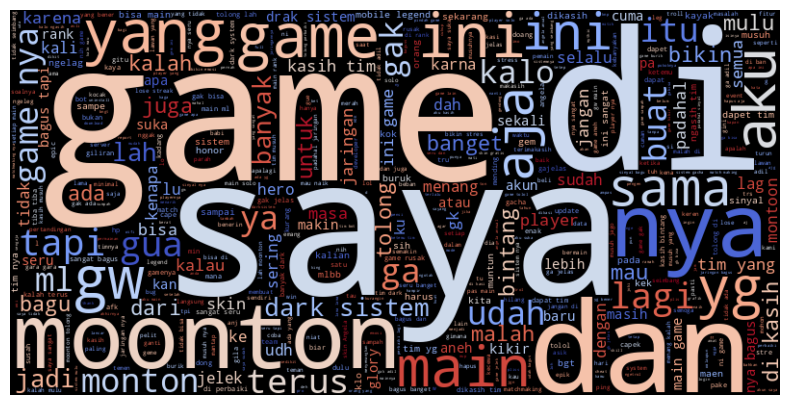

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong (')
df['Review Text'] = df['Review Text'].fillna('')

# Menggabungkan semua teks dari kolom 'Review Text' menjadi satu string
text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500,
               width=800, height=400, colormap='coolwarm')
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

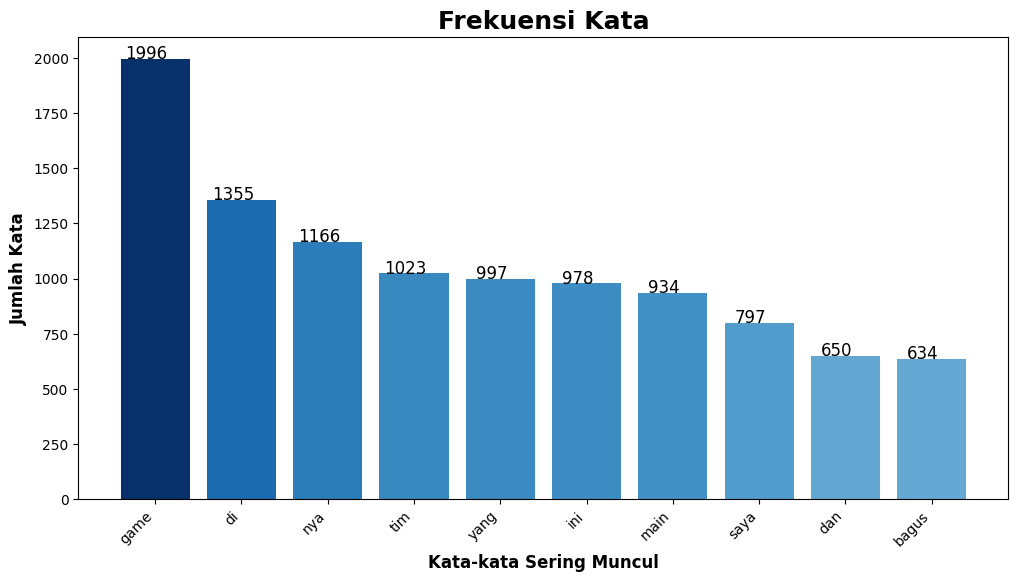

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df['Review Text'])

tokens = text.split()
word_counts = Counter(text.split())

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan Palet Warna
max_count = max(count)
normalized_counts = [c / max_count for c in count]

colors = [plt.cm.Blues(0.3 + 0.7 * c) for c in normalized_counts]

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Menambahkan Angka Rata Tengah Diatas setiap Bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

**Proses Cleaning**

---



In [ ]:
from textwrap import TextWrapper
import re
import string
import nltk

# Fungsi Untuk Menghapus URL
def remove_URL(tweet):
  if tweet is not None and isinstance(tweet, str):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)
  else:
    return tweet

# Fungsi Untuk Menghapus HTML
def remove_html(tweet):
  if tweet is not None and isinstance(tweet, str):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)
  else:
    return tweet

# Fungsi Untuk Menghapus Emoji
def remove_emoji(tweet):
  if tweet is not None and isinstance(tweet, str):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # Emoticons
            u"\U0001F300-\U0001F5FF"  # Simbol & Piktograf
            u"\U0001F680-\U0001F6FF"  # Transportasi & Simbol
            u"\U0001F700-\U0001F77F"  # Simbol Misc
            u"\U0001F780-\U0001F7FF"  # Simbol Geometri Tambahan
            u"\U0001F800-\U0001F8FF"  # Simbol Tambahan
            u"\U0001F900-\U0001F9FF"  # Ekstensi Emoji
            u"\U0001FA70-\U0001FAFF"  # Simbol & Emoji tambahan
            u"\U00002700-\U000027BF"  # Simbol Dingbat
            u"\U000024C2-\U0001F251"  # Simbol Misc lainnya
                                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)
  else:
    return tweet

# Fungsi Untuk Menghapus Simbol
def remove_symbols(tweet):
  if tweet is not None and isinstance(tweet, str):
      tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
      return tweet

# Fungsi Untuk Menghapus Angka
def remove_number(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

df['cleaning'] = df['Review Text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_number(x))

df.head(10)

,Date,Username,Rating,Review Text,cleaning
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus,agat bagus
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru,lumayan seru
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis,bagus dapat senin gratis
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem,kurangin dark sistem
4,2025-06-08 01:20:47,Pengguna Google,1,game anj,game anj
5,2025-06-08 01:19:24,Pengguna Google,1,cukup ya moonton. ls mulu kocak.,cukup ya moonton ls mulu kocak
6,2025-06-08 01:18:17,Pengguna Google,3,"Gw main game mau ngilangin stres, malah nambah...",Gw main game mau ngilangin stres malah nambah ...
7,2025-06-08 01:17:55,Pengguna Google,3,gemnya ga adil masa aku dikasih tim dragsisrem...,gemnya ga adil masa aku dikasih tim dragsisrem...
8,2025-06-08 01:17:34,Pengguna Google,1,"padahal kurang 1 bintang lagi naik ke mythic, ...",padahal kurang bintang lagi naik ke mythic ud...
9,2025-06-08 01:17:12,Pengguna Google,5,papa muntun maaf ya kemarin marah marah kalo m...,papa muntun maaf ya kemarin marah marah kalo m...


**Proses Case Folding**

---



In [ ]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head()

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus,agat bagus,agat bagus
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru,lumayan seru,lumayan seru
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem,kurangin dark sistem,kurangin dark sistem
4,2025-06-08 01:20:47,Pengguna Google,1,game anj,game anj,game anj


**Normalisasi Kata**

---



In [ ]:
import pandas as pd

# Fungsi Penggantian Kata Tidak Baku
def replace_taboo_words(text, kamus_tidak_baku):
  if isinstance(text, str):
     words = text.split()
     replaced_words = []
     kalimat_baku = []
     kata_diganti = []
     kata_tidak_baku_hash = []

     for word in words:
         if word in kamus_tidak_baku:
            baku_word = kamus_tidak_baku[word]
            if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
               replaced_words.append(baku_word)
               kalimat_baku.append(baku_word)
               kata_diganti.append(word)
               kata_tidak_baku_hash.append(hash(word))
            #else:
            #    replaced_words.append('<karakter eksplisit>')
            #   kalimat_baku.append(word)
         else:
             replaced_words.append(word)
     replace_text = ' '.join(replaced_words)
  else:
      replaced_text = ''
      kalimat_baku = []
      kata_diganti = []
      kata_tidak_baku_hash = []

  return replace_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash


In [ ]:
# Baca Dataset
data = pd.DataFrame(df[['Date', 'Username', 'Rating', 'Review Text', 'cleaning', 'case_folding']])
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus,agat bagus,agat bagus
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru,lumayan seru,lumayan seru
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem,kurangin dark sistem,kurangin dark sistem
4,2025-06-08 01:20:47,Pengguna Google,1,game anj,game anj,game anj


In [ ]:
# Baca Kamus Kata Tidak Baku
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# Terapkan Fungsi Penggantian Kata Tidak Baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))
# data.head()

df = pd.DataFrame(data[['Date', 'Username', 'Rating', 'Review Text', 'cleaning', 'case_folding', 'normalisasi']])
df.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus,agat bagus,agat bagus,agat bagus
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru,lumayan seru,lumayan seru,lumayan seru
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem,kurangin dark sistem,kurangin dark sistem,kurangi dark sistem
4,2025-06-08 01:20:47,Pengguna Google,1,game anj,game anj,game anj,game anjing


**Tokenization**

---



In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus,agat bagus,agat bagus,agat bagus,"[agat, bagus]"
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru,lumayan seru,lumayan seru,lumayan seru,"[lumayan, seru]"
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,"[bagus, dapat, senin, gratis]"
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem,kurangin dark sistem,kurangin dark sistem,kurangi dark sistem,"[kurangi, dark, sistem]"
4,2025-06-08 01:20:47,Pengguna Google,1,game anj,game anj,game anj,game anjing,"[game, anjing]"


**Proses Stopword Removal**

---



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(remove_stopwords)
df.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus,agat bagus,agat bagus,agat bagus,"[agat, bagus]","[agat, bagus]"
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru,lumayan seru,lumayan seru,lumayan seru,"[lumayan, seru]","[lumayan, seru]"
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,"[bagus, dapat, senin, gratis]","[bagus, senin, gratis]"
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem,kurangin dark sistem,kurangin dark sistem,kurangi dark sistem,"[kurangi, dark, sistem]","[kurangi, dark, sistem]"
4,2025-06-08 01:20:47,Pengguna Google,1,game anj,game anj,game anj,game anjing,"[game, anjing]","[game, anjing]"


**Proses Stemming Data**

---



In [ ]:


from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['stemming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus,agat bagus,agat bagus,agat bagus,"[agat, bagus]","[agat, bagus]",agat bagus
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru,lumayan seru,lumayan seru,lumayan seru,"[lumayan, seru]","[lumayan, seru]",lumayan seru
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,"[bagus, dapat, senin, gratis]","[bagus, senin, gratis]",bagus senin gratis
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem,kurangin dark sistem,kurangin dark sistem,kurangi dark sistem,"[kurangi, dark, sistem]","[kurangi, dark, sistem]",kurang dark sistem
4,2025-06-08 01:20:47,Pengguna Google,1,game anj,game anj,game anj,game anjing,"[game, anjing]","[game, anjing]",game anjing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4938 entries, 0 to 5374
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              4938 non-null   object
 1   Username          4938 non-null   object
 2   Rating            4938 non-null   int64 
 3   Review Text       4938 non-null   object
 4   cleaning          4938 non-null   object
 5   case_folding      4938 non-null   object
 6   normalisasi       4938 non-null   object
 7   tokenize          4938 non-null   object
 8   stopword removal  4938 non-null   object
 9   stemming_data     4938 non-null   object
dtypes: int64(1), object(9)
memory usage: 553.4+ KB


In [ ]:
df.to_csv('Hasil_preprocessing_ulasan_app_mobile_legends(5375).csv',encoding='utf8', index=False)

**Wordcloud Setelah Preprocessing**

---



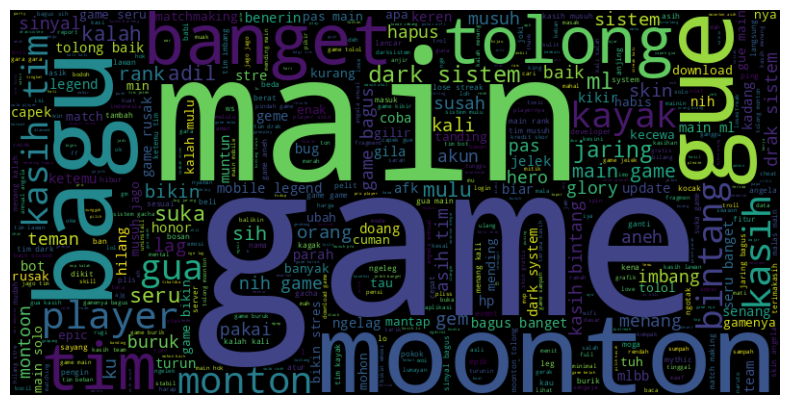

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
# df['stemming_data'] = df[stemming_data'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['stemming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()



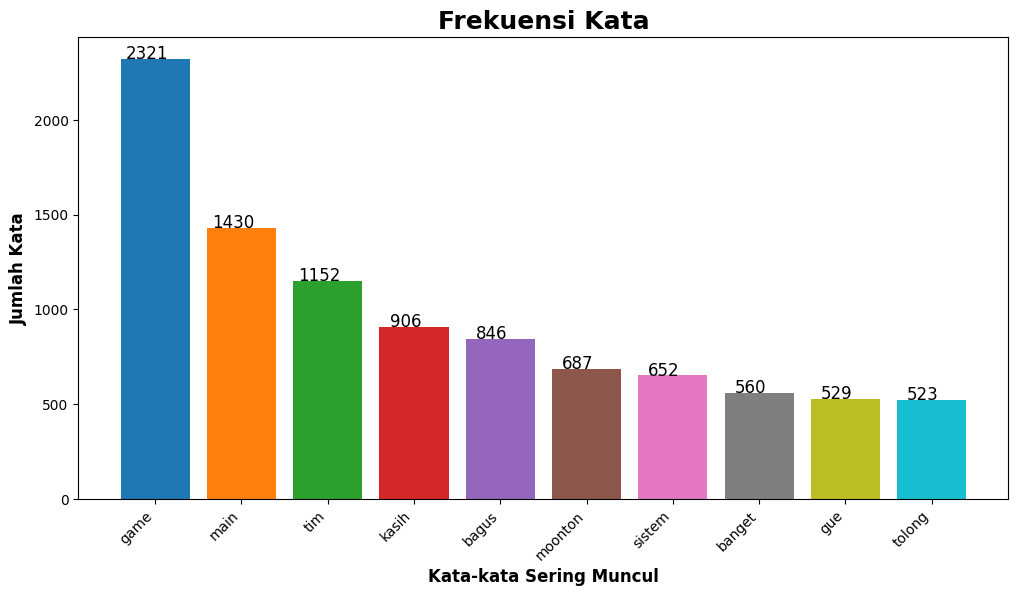

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df['stemming_data'])

tokens = text.split()

# Filter out stop words from the tokens list
stopwords = set(STOPWORDS) # Make sure STOPWORDS is imported if not already
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya'])
filtered_tokens = [word for word in tokens if word not in stopwords]


word_counts = Counter(filtered_tokens) # Use filtered_tokens here

top_words = word_counts.most_common(10)

# Check if top_words is not empty before unpacking
if top_words:
    word, count = zip(*top_words)

    # Definisikan Palet Warna
    colors = plt.cm.tab10(range(len(word)))

    plt.figure(figsize=(12, 6))
    bars = plt.bar(word, count, color=colors)
    plt.xlabel("Kata-kata Sering Muncul", fontsize=12, fontweight='bold')
    plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
    plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Menambahkan Angka Rata Tengah Diatas setiap Bar
    for bar, num in zip(bars, count):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

    plt.show()
else:
    print("Tidak ada kata yang tersisa setelah filtering.") # Handle case where no words are left

# Labelling Data Lexicon Based

**Link Github Label Positif & negatif : https://github.com/fajri91/InSet**

In [ ]:
import pandas as pd

data = pd.read_csv('Hasil_preprocessing_ulasan_app_mobile_legends(5375).csv')
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus,agat bagus,agat bagus,agat bagus,"['agat', 'bagus']","['agat', 'bagus']",agat bagus
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru,lumayan seru,lumayan seru,lumayan seru,"['lumayan', 'seru']","['lumayan', 'seru']",lumayan seru
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,"['bagus', 'dapat', 'senin', 'gratis']","['bagus', 'senin', 'gratis']",bagus senin gratis
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem,kurangin dark sistem,kurangin dark sistem,kurangi dark sistem,"['kurangi', 'dark', 'sistem']","['kurangi', 'dark', 'sistem']",kurang dark sistem
4,2025-06-08 01:20:47,Pengguna Google,1,game anj,game anj,game anj,game anjing,"['game', 'anjing']","['game', 'anjing']",game anjing


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4938 entries, 0 to 4937
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              4938 non-null   object
 1   Username          4938 non-null   object
 2   Rating            4938 non-null   int64 
 3   Review Text       4938 non-null   object
 4   cleaning          4914 non-null   object
 5   case_folding      4914 non-null   object
 6   normalisasi       4901 non-null   object
 7   tokenize          4938 non-null   object
 8   stopword removal  4938 non-null   object
 9   stemming_data     4884 non-null   object
dtypes: int64(1), object(9)
memory usage: 385.9+ KB


In [ ]:
df = data.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4884 entries, 0 to 4937
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              4884 non-null   object
 1   Username          4884 non-null   object
 2   Rating            4884 non-null   int64 
 3   Review Text       4884 non-null   object
 4   cleaning          4884 non-null   object
 5   case_folding      4884 non-null   object
 6   normalisasi       4884 non-null   object
 7   tokenize          4884 non-null   object
 8   stopword removal  4884 non-null   object
 9   stemming_data     4884 non-null   object
dtypes: int64(1), object(9)
memory usage: 419.7+ KB


In [ ]:
def determine_sentiment(text):
    pos = sum(1 for word in text.split() if word in positive_lexicon)
    neg = sum(1 for word in text.split() if word in negative_lexicon)
    return 'Positif' if pos > neg else 'Negatif'

In [ ]:
import pandas as pd

# Fungsi Untuk Menentukan Sentimen
def determine_sentiment(text):
  positive_count = sum(1 for word in text.split() if word in positive_lexicon)
  negative_count = sum(1 for word in text.split() if word in negative_lexicon)
  if positive_count > negative_count:
    return 'Positif'
  elif positive_count < negative_count:
    return 'Negatif'

# Baca Kamus Lexicon Positif dan Negatif
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

def replace_none_sentiment(sentiment):
  replace_flag = "Positif"
  for i in range(len(sentiment)):
    if sentiment[i] is None:
       sentiment[i] = replace_flag
       replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiment

# Tambahkan Kolom Sentimen
df['Sentiment'] = df['stemming_data'].apply(determine_sentiment)
df['Sentiment'] = replace_none_sentiment(df['Sentiment'].tolist())

df.head()

<ipython-input-43-2148244780>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['stemming_data'].apply(determine_sentiment)
<ipython-input-43-2148244780>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = replace_none_sentiment(df['Sentiment'].tolist())


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data,Sentiment
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus,agat bagus,agat bagus,agat bagus,"['agat', 'bagus']","['agat', 'bagus']",agat bagus,Positif
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru,lumayan seru,lumayan seru,lumayan seru,"['lumayan', 'seru']","['lumayan', 'seru']",lumayan seru,None
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,"['bagus', 'dapat', 'senin', 'gratis']","['bagus', 'senin', 'gratis']",bagus senin gratis,Positif
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem,kurangin dark sistem,kurangin dark sistem,kurangi dark sistem,"['kurangi', 'dark', 'sistem']","['kurangi', 'dark', 'sistem']",kurang dark sistem,Negatif
4,2025-06-08 01:20:47,Pengguna Google,1,game anj,game anj,game anj,game anjing,"['game', 'anjing']","['game', 'anjing']",game anjing,None


<ipython-input-44-3496501395>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")


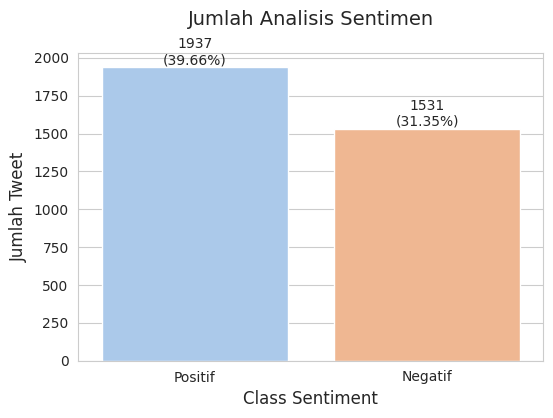

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df['Sentiment'].value_counts()
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")
plt.title("Jumlah Analisis Sentimen", fontsize=14, pad=20)
plt.xlabel("Class Sentiment", fontsize=12)
plt.ylabel("Jumlah Tweet", fontsize=12)

total = len(df['Sentiment'])

for i, count in enumerate(sentiment_counts.values):
  percentage = f'{100 * count / total:.2f}%'
  ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
df.to_csv('Hasil_labelling_data_mobile_legends(5375).csv',encoding='utf8', index=False)

# Model Algoritma Naive Bayes & Decision Tree

In [ ]:
import pandas as pd

data = pd.read_csv('Hasil_labelling_data_mobile_legends(5375).csv')
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data,Sentiment
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus,agat bagus,agat bagus,agat bagus,"['agat', 'bagus']","['agat', 'bagus']",agat bagus,Positif
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru,lumayan seru,lumayan seru,lumayan seru,"['lumayan', 'seru']","['lumayan', 'seru']",lumayan seru,NaN
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,"['bagus', 'dapat', 'senin', 'gratis']","['bagus', 'senin', 'gratis']",bagus senin gratis,Positif
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem,kurangin dark sistem,kurangin dark sistem,kurangi dark sistem,"['kurangi', 'dark', 'sistem']","['kurangi', 'dark', 'sistem']",kurang dark sistem,Negatif
4,2025-06-08 01:20:47,Pengguna Google,1,game anj,game anj,game anj,game anjing,"['game', 'anjing']","['game', 'anjing']",game anjing,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              4884 non-null   object
 1   Username          4884 non-null   object
 2   Rating            4884 non-null   int64 
 3   Review Text       4884 non-null   object
 4   cleaning          4884 non-null   object
 5   case_folding      4884 non-null   object
 6   normalisasi       4884 non-null   object
 7   tokenize          4884 non-null   object
 8   stopword removal  4884 non-null   object
 9   stemming_data     4884 non-null   object
 10  Sentiment         3468 non-null   object
dtypes: int64(1), object(10)
memory usage: 419.8+ KB


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3468 entries, 0 to 4934
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              3468 non-null   object
 1   Username          3468 non-null   object
 2   Rating            3468 non-null   int64 
 3   Review Text       3468 non-null   object
 4   cleaning          3468 non-null   object
 5   case_folding      3468 non-null   object
 6   normalisasi       3468 non-null   object
 7   tokenize          3468 non-null   object
 8   stopword removal  3468 non-null   object
 9   stemming_data     3468 non-null   object
 10  Sentiment         3468 non-null   object
dtypes: int64(1), object(10)
memory usage: 325.1+ KB


In [ ]:
from sklearn.model_selection import train_test_split
# Membagi Data Menjadi Data Latih dan Data Uji 80:20
X_train, X_test, y_train, y_test = train_test_split(df['stemming_data'], df['Sentiment'], test_size=0.2, random_state=42)
# Membagi Data Menjadi Data Latih dan Data Uji 75:25
X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(df['stemming_data'], df['Sentiment'], test_size=0.25, random_state=42)
# Membagi Data Menjadi Data Latih dan Data Uji 70:30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(df['stemming_data'], df['Sentiment'], test_size=0.30, random_state=42)
# Membagi Data Menjadi Data Latih dan Data Uji 60:40
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(df['stemming_data'], df['Sentiment'], test_size=0.40, random_state=42)


In [ ]:
# Simpan Data Latih 80:20 ke File
train_set = pd.DataFrame({'text': X_train, 'Sentiment': y_train})
train_set.to_csv('train_data(80:20).csv', index=False)

# Simpan Data Latih 75:25 ke File
train_set_75 = pd.DataFrame({'text': X_train_75, 'Sentiment': y_train_75})
train_set_75.to_csv('train_data(75:25).csv', index=False)

# Simpan Data Latih 70:30 ke File
train_set_70 = pd.DataFrame({'text': X_train_70, 'Sentiment': y_train_70})
train_set_70.to_csv('train_data(70:30).csv', index=False)

# Simpan Data Latih 60:40 ke File
train_set_60 = pd.DataFrame({'text': X_train_60, 'Sentiment': y_train_60})
train_set_60.to_csv('train_data(60:40).csv', index=False)

In [ ]:
# Simpan data Uji 80:20 ke File
test_set = pd.DataFrame({'text': X_test, 'Sentiment': y_test})
test_set.to_csv('test_data(80:20).csv', index=False)

# Simpan data Uji 75:25 ke File
test_set_75 = pd.DataFrame({'text': X_test_25, 'Sentiment': y_test_25})
test_set_75.to_csv('test_data(75:25).csv', index=False)

# Simpan Data Uji 70:30 ke File
test_set_70 = pd.DataFrame({'text': X_test_30, 'Sentiment': y_test_30})
test_set_70.to_csv('test_data(70:30).csv', index=False)

# Simpan Data Uji 60:40 ke File
test_set_60 = pd.DataFrame({'text': X_test_40, 'Sentiment': y_test_40})
test_set_60.to_csv('test_data(60:40).csv', index=False)

In [ ]:
# Menampilkan Informasi Jumlah Data Total 80:20
print("Jumlah Data Total (80:20):", len(X_train) + len(X_test))

# Menampilkan Informasi Rasio Perbandingan 80:20
print("Rasio Perbandingan (80:20):", "{:.2f}%".format((len(X_train) / (len(X_train) + len(X_test))) * 100))

# Menampilkan Informasi Jumlah Klasifikasi Sentimen 80:20
print("Jumlah Klasifikasi Sentimen (80:20):")
print(y_train.value_counts(), "\n")  # Distribusi sentimen dalam data latih
print(y_test.value_counts())         # Distribusi sentimen dalam data uji

# Menampilkan Informasi Jumlah Data Latih 80:20
print("Jumlah Data Latih (80:20):", len(X_train))

# Menampilkan Informasi Jumlah Data Uji 80:20
print("Jumlah Data Uji (80:20):", len(X_test))

print("===============================================")

# Menampilkan Informasi Jumlah Data Total 75:25
print("Jumlah Data Total (75:25):", len(X_train_75) + len(X_test_25))

# Menampilkan Informasi Rasio Perbandingan 75:25
print("Rasio Perbandingan (75:25):", "{:.2f}%".format((len(X_train_75) / (len(X_train_75) + len(X_test_25))) * 100))

# Menampilkan Informasi Jumlah Klasifikasi Sentimen 75:25
print("Jumlah Klasifikasi Sentimen (75:25):")
print(y_train_75.value_counts(), "\n")
print(y_test_25.value_counts())

# Menampilkan Informasi Jumlah Data Latih 75:25
print("Jumlah Data Latih (75:25):", len(X_train_75))

# Menampilkan Informasi Jumlah Data Uji 75:25
print("Jumlah Data Uji (75:25):", len(X_test_25))

print("===============================================")

# Menampilkan Informasi Jumlah Data Total 70:30
print("Jumlah Data Total (70:30):", len(X_train_70) + len(X_test_30))

# Menampilkan Informasi Rasio Perbandingan 70:30
print("Rasio Perbandingan (70:30):", "{:.2f}%".format((len(X_train_70) / (len(X_train_70) + len(X_test_30))) * 100))

# Menampilkan Informasi Jumlah Klasifikasi Sentimen 70:30
print("Jumlah Klasifikasi Sentimen (70:30):")
print(y_train_70.value_counts(), "\n")
print(y_test_30.value_counts())

# Menampilkan Informasi Jumlah Data Latih 70:30
print("Jumlah Data Latih (70:30):", len(X_train_70))

# Menampilkan Informasi Jumlah Data Uji 70:30
print("Jumlah Data Uji (70:30):", len(X_test_30))

print("===============================================")

# Menampilkan Informasi Jumlah Data Total 60:40
print("Jumlah Data Total (60:40):", len(X_train_60) + len(X_test_40))

# Menampilkan Informasi Rasio Perbandingan 60:40
print("Rasio Perbandingan (60:40):", "{:.2f}%".format((len(X_train_60) / (len(X_train_60) + len(X_test_40))) * 100))

# Menampilkan Informasi Jumlah Klasifikasi Sentimen 60:40
print("Jumlah Klasifikasi Sentimen (60:40):")
print(y_train_60.value_counts(), "\n")
print(y_test_40.value_counts())

# Menampilkan Informasi Jumlah Data Latih 60:40
print("Jumlah Data Latih (60:40):", len(X_train_60))

# Menampilkan Informasi Jumlah Data Uji 60:40
print("Jumlah Data Uji (60:40):", len(X_test_40))

Jumlah Data Total (80:20): 3468
Rasio Perbandingan (80:20): 79.99%
Jumlah Klasifikasi Sentimen (80:20):
Sentiment
Positif    1576
Negatif    1198
Name: count, dtype: int64 

Sentiment
Positif    361
Negatif    333
Name: count, dtype: int64
Jumlah Data Latih (80:20): 2774
Jumlah Data Uji (80:20): 694
Jumlah Data Total (75:25): 3468
Rasio Perbandingan (75:25): 75.00%
Jumlah Klasifikasi Sentimen (75:25):
Sentiment
Positif    1479
Negatif    1122
Name: count, dtype: int64 

Sentiment
Positif    458
Negatif    409
Name: count, dtype: int64
Jumlah Data Latih (75:25): 2601
Jumlah Data Uji (75:25): 867
Jumlah Data Total (70:30): 3468
Rasio Perbandingan (70:30): 69.98%
Jumlah Klasifikasi Sentimen (70:30):
Sentiment
Positif    1375
Negatif    1052
Name: count, dtype: int64 

Sentiment
Positif    562
Negatif    479
Name: count, dtype: int64
Jumlah Data Latih (70:30): 2427
Jumlah Data Uji (70:30): 1041
Jumlah Data Total (60:40): 3468
Rasio Perbandingan (60:40): 59.98%
Jumlah Klasifikasi Sentimen (

In [ ]:

import pandas as pd

# Membuat DataFrame dari hasil perhitungan
data_summary = pd.DataFrame({
    'Rasio': ['80:20', '75:25', '70:30', '60:40'],
    'Jumlah Total': [
        len(X_train) + len(X_test),
        len(X_train_75) + len(X_test_25),
        len(X_train_70) + len(X_test_30),
        len(X_train_60) + len(X_test_40)
    ],
    'Jumlah Data Latih': [
        len(X_train),
        len(X_train_75),
        len(X_train_70),
        len(X_train_60)
    ],
    'Jumlah Data Uji': [
        len(X_test),
        len(X_test_25),
        len(X_test_30),
        len(X_test_40)
    ],
    'Rasio Data Latih (%)': [
        (len(X_train) / (len(X_train) + len(X_test))) * 100,
        (len(X_train_75) / (len(X_train_75) + len(X_test_25))) * 100,
        (len(X_train_70) / (len(X_train_70) + len(X_test_30))) * 100,
        (len(X_train_60) / (len(X_train_60) + len(X_test_40))) * 100
    ],
    'Jumlah Klasifikasi Sentimen Data Latih': [
        y_train.value_counts().to_dict(),
        y_train_75.value_counts().to_dict(),
        y_train_70.value_counts().to_dict(),
        y_train_60.value_counts().to_dict()
    ],
    'Jumlah Klasifikasi Sentimen Data Uji': [
        y_test.value_counts().to_dict(),
        y_test_25.value_counts().to_dict(),
        y_test_30.value_counts().to_dict(),
        y_test_40.value_counts().to_dict()
    ]
})

# Menyimpan ke file CSV
data_summary.to_csv("data_summary.csv", index=False)
data_summary.head()

,Rasio,Jumlah Total,Jumlah Data Latih,Jumlah Data Uji,Rasio Data Latih (%),Jumlah Klasifikasi Sentimen Data Latih,Jumlah Klasifikasi Sentimen Data Uji
0,80:20,3468,2774,694,79.988466,"{'Positif': 1576, 'Negatif': 1198}","{'Positif': 361, 'Negatif': 333}"
1,75:25,3468,2601,867,75.000000,"{'Positif': 1479, 'Negatif': 1122}","{'Positif': 458, 'Negatif': 409}"
2,70:30,3468,2427,1041,69.982699,"{'Positif': 1375, 'Negatif': 1052}","{'Positif': 562, 'Negatif': 479}"
3,60:40,3468,2080,1388,59.976932,"{'Positif': 1176, 'Negatif': 904}","{'Positif': 761, 'Negatif': 627}"


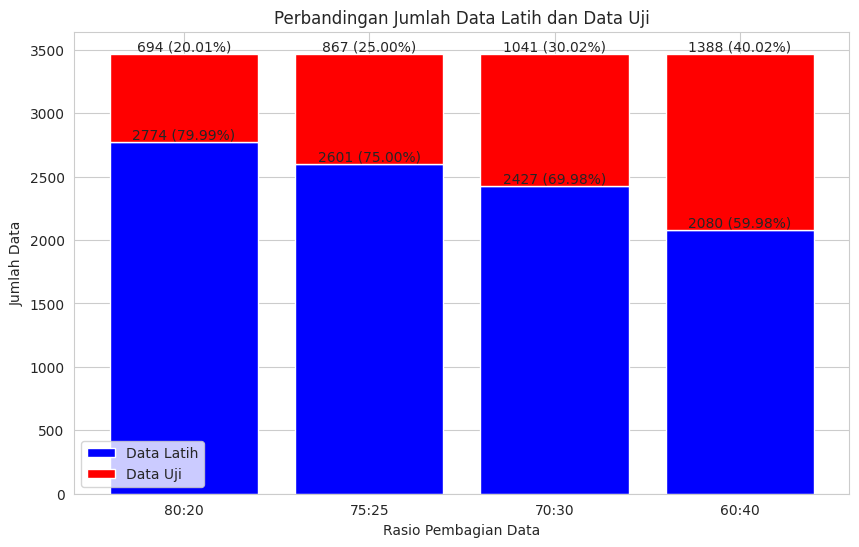

In [ ]:
import matplotlib.pyplot as plt

# Jumlah Data Latih dan Data Uji untuk setiap rasio
data_splits = {
    '80:20': (len(X_train), len(X_test)),
    '75:25': (len(X_train_75), len(X_test_25)),
    '70:30': (len(X_train_70), len(X_test_30)),
    '60:40': (len(X_train_60), len(X_test_40))
}

# Membuat Plot
plt.figure(figsize=(10, 6))

# Menyiapkan daftar nilai dan label
labels = list(data_splits.keys())
train_sizes = [split[0] for split in data_splits.values()]
test_sizes = [split[1] for split in data_splits.values()]

bars1 = plt.bar(labels, train_sizes, color='blue', label='Data Latih')
bars2 = plt.bar(labels, test_sizes, bottom=train_sizes, color='red', label='Data Uji')

# Menambahkan label pada setiap bar (jumlah dan persentase)
# Iterate through the bars of both bar containers using enumerate for indexing
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    # Text for train bars
    height1 = bar1.get_height()
    total_size = train_sizes[i] + test_sizes[i]
    plt.text(bar1.get_x() + bar1.get_width()/2, height1 + 0.7, f'{train_sizes[i]} ({(train_sizes[i] / total_size) * 100:.2f}%)',
             ha='center', va='bottom')

    # Text for test bars (placed above the combined height)
    height2 = bar2.get_height()
    plt.text(bar2.get_x() + bar2.get_width()/2, height1 + height2 + 0.7, f'{test_sizes[i]} ({(test_sizes[i] / total_size) * 100:.2f}%)',
             ha='center', va='bottom')


plt.title('Perbandingan Jumlah Data Latih dan Data Uji')
plt.xlabel('Rasio Pembagian Data')
plt.ylabel('Jumlah Data')
plt.legend()
plt.show()

**Naive Bayes**

---



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# untuk naive bayes
# Mendefinisikan Vectorizer Rasio 80:20 untuk Naïve Bayes
Vectorizer_NB_80 = TfidfVectorizer()
X_train_vectorized_NB_80 = Vectorizer_NB_80.fit_transform(X_train)
X_test_vectorized_NB_80 = Vectorizer_NB_80.transform(X_test)

# Mendefinisikan Vectorizer Rasio 75:25 untuk Naïve Bayes
Vectorizer_NB_75 = TfidfVectorizer()
X_train_vectorized_NB_75 = Vectorizer_NB_75.fit_transform(X_train_75)
X_test_vectorized_NB_25 = Vectorizer_NB_75.transform(X_test_25)

# Mendefinisikan Vectorizer Rasio 70:30 untuk Naïve Bayes
Vectorizer_NB_70 = TfidfVectorizer()
X_train_vectorized_NB_70 = Vectorizer_NB_70.fit_transform(X_train_70)
X_test_vectorized_NB_30 = Vectorizer_NB_70.transform(X_test_30)

# Mendefinisikan Vectorizer Rasio 60:40 untuk Naïve Bayes
Vectorizer_NB_60 = TfidfVectorizer()
X_train_vectorized_NB_60 = Vectorizer_NB_60.fit_transform(X_train_60)
X_test_vectorized_NB_40 = Vectorizer_NB_60.transform(X_test_40)

# untuk decision tree

# Mendefinisikan Vectorizer Rasio 80:20 untuk Decision Tree
Vectorizer_DT_80 = TfidfVectorizer()
X_train_vectorized_DT_80 = Vectorizer_DT_80.fit_transform(X_train)
X_test_vectorized_DT_80 = Vectorizer_DT_80.transform(X_test)

# Mendefinisikan Vectorizer Rasio 75:25 untuk Decision Tree
Vectorizer_DT_75 = TfidfVectorizer()
X_train_vectorized_DT_75 = Vectorizer_DT_75.fit_transform(X_train_75)
X_test_vectorized_DT_25 = Vectorizer_DT_75.transform(X_test_25)

# Mendefinisikan Vectorizer Rasio 70:30 untuk Decision Tree
Vectorizer_DT_70 = TfidfVectorizer()
X_train_vectorized_DT_70 = Vectorizer_DT_70.fit_transform(X_train_70)
X_test_vectorized_DT_30 = Vectorizer_DT_70.transform(X_test_30)

# Mendefinisikan Vectorizer Rasio 60:40 untuk Decision Tree
Vectorizer_DT_60 = TfidfVectorizer()
X_train_vectorized_DT_60 = Vectorizer_DT_60.fit_transform(X_train_60)
X_test_vectorized_DT_40 = Vectorizer_DT_60.transform(X_test_40)

In [ ]:
# Naïve Bayes
# Menampilkan Hasil Vektorisasi Rasio 80:20
print("Matriks Vektorisasi Untuk Data Latih (80:20) - Naïve Bayes")
print(X_train_vectorized_NB_80.toarray())

# Menampilkan Sebagian Kecil Matriks 80:20
print("\nSebagian Kecil Matriks Vektorisasi Untuk Data Uji (80:20) - Naïve Bayes")
print(X_test_vectorized_NB_80[:5, :].toarray())

print("===============================================")

# Menampilkan Hasil Vektorisasi Rasio 75:25
print("Matriks Vektorisasi Untuk Data Latih (75:25) - Naïve Bayes")
print(X_train_vectorized_NB_75.toarray())

# Menampilkan Sebagian Kecil Matriks 75:25
print("\nSebagian Kecil Matriks Vektorisasi Untuk Data Uji (75:25) - Naïve Bayes")
print(X_test_vectorized_NB_25[:5, :].toarray())

print("===============================================")

# Menampilkan Hasil Vektorisasi Rasio 70:30
print("Matriks Vektorisasi Untuk Data Latih (70:30) - Naïve Bayes")
print(X_train_vectorized_NB_70.toarray())

# Menampilkan Sebagian Kecil Matriks 70:30
print("\nSebagian Kecil Matriks Vektorisasi Untuk Data Uji (70:30) - Naïve Bayes")
print(X_test_vectorized_NB_30[:5, :].toarray())

print("===============================================")

# Menampilkan Hasil Vektorisasi Rasio 60:40
print("Matriks Vektorisasi Untuk Data Latih (60:40) - Naïve Bayes")
print(X_train_vectorized_NB_60.toarray())

# Menampilkan Sebagian Kecil Matriks 60:40
print("\nSebagian Kecil Matriks Vektorisasi Untuk Data Uji (60:40) - Naïve Bayes")
print(X_test_vectorized_NB_40[:5, :].toarray())


# Decision Tree
# Menampilkan Hasil Vektorisasi Rasio 80:20
print("Matriks Vektorisasi Untuk Data Latih (80:20) - Decision Tree")
print(X_train_vectorized_DT_80.toarray())

# Menampilkan Sebagian Kecil Matriks 80:20
print("\nSebagian Kecil Matriks Vektorisasi Untuk Data Uji (80:20) - Decision Tree")
print(X_test_vectorized_DT_80[:5, :].toarray())

print("===============================================")

# Menampilkan Hasil Vektorisasi Rasio 75:25
print("Matriks Vektorisasi Untuk Data Latih (75:25) - Decision Tree")
print(X_train_vectorized_DT_75.toarray())

# Menampilkan Sebagian Kecil Matriks 75:25
print("\nSebagian Kecil Matriks Vektorisasi Untuk Data Uji (75:25) - Decision Tree")
print(X_test_vectorized_DT_25[:5, :].toarray())

print("===============================================")

# Menampilkan Hasil Vektorisasi Rasio 70:30
print("Matriks Vektorisasi Untuk Data Latih (70:30) - Decision Tree")
print(X_train_vectorized_DT_70.toarray())

# Menampilkan Sebagian Kecil Matriks 70:30
print("\nSebagian Kecil Matriks Vektorisasi Untuk Data Uji (70:30) - Decision Tree")
print(X_test_vectorized_DT_30[:5, :].toarray())

print("===============================================")

# Menampilkan Hasil Vektorisasi Rasio 60:40
print("Matriks Vektorisasi Untuk Data Latih (60:40) - Decision Tree")
print(X_train_vectorized_DT_60.toarray())

# Menampilkan Sebagian Kecil Matriks 60:40
print("\nSebagian Kecil Matriks Vektorisasi Untuk Data Uji (60:40) - Decision Tree")
print(X_test_vectorized_DT_40[:5, :].toarray())

Matriks Vektorisasi Untuk Data Latih (80:20) - Naïve Bayes
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian Kecil Matriks Vektorisasi Untuk Data Uji (80:20) - Naïve Bayes
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Matriks Vektorisasi Untuk Data Latih (75:25) - Naïve Bayes
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sebagian Kecil Matriks Vektorisasi Untuk Data Uji (75:25) - Naïve Bayes
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Matriks Vektorisasi Untuk Data Latih (70:30) - Naïve Bayes
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 

In [ ]:

# Naive Bayes
# Membuat dan Melatih Model Naïve Bayes Rasio 80:20
nb_80 = MultinomialNB()
nb_80.fit(X_train_vectorized_NB_80, y_train)

# Membuat dan Melatih Model Naïve Bayes Rasio 75:25
nb_75 = MultinomialNB()
nb_75.fit(X_train_vectorized_NB_75, y_train_75)

# Membuat dan Melatih Model Naïve Bayes Rasio 70:30
nb_70 = MultinomialNB()
nb_70.fit(X_train_vectorized_NB_70, y_train_70)

# Membuat dan Melatih Model Naïve Bayes Rasio 60:40
nb_60 = MultinomialNB()
nb_60.fit(X_train_vectorized_NB_60, y_train_60)


# Decision Tree

# Membuat dan Melatih Model Decision Tree Rasio 80:20
dt_80 = DecisionTreeClassifier(random_state=42)
dt_80.fit(X_train_vectorized_DT_80, y_train)

# Membuat dan Melatih Model Decision Tree Rasio 75:25
dt_75 = DecisionTreeClassifier(random_state=42)
dt_75.fit(X_train_vectorized_DT_75, y_train_75)

# Membuat dan Melatih Model Decision Tree Rasio 70:30
dt_70 = DecisionTreeClassifier(random_state=42)
dt_70.fit(X_train_vectorized_DT_70, y_train_70)

# Membuat dan Melatih Model Decision Tree Rasio 60:40
dt_60 = DecisionTreeClassifier(random_state=42)
dt_60.fit(X_train_vectorized_DT_60, y_train_60)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Naive bayes
# Evaluasi Model Naïve Bayes Rasio 80:20
y_pred_nb_80 = nb_80.predict(X_test_vectorized_NB_80)

# Evaluasi Model Naïve Bayes Rasio 75:25
y_pred_nb_75 = nb_75.predict(X_test_vectorized_NB_25)

# Evaluasi Model Naïve Bayes Rasio 70:30
y_pred_nb_70 = nb_70.predict(X_test_vectorized_NB_30)

# Evaluasi Model Naïve Bayes Rasio 60:40
y_pred_nb_60 = nb_60.predict(X_test_vectorized_NB_40)

# Decision Tree
# Evaluasi Model Decision Tree Rasio 80:20
y_pred_dt_80 = dt_80.predict(X_test_vectorized_DT_80)

# Evaluasi Model Decision Tree Rasio 75:25
y_pred_dt_75 = dt_75.predict(X_test_vectorized_DT_25)

# Evaluasi Model Decision Tree Rasio 70:30
y_pred_dt_70 = dt_70.predict(X_test_vectorized_DT_30)

# Evaluasi Model Decision Tree Rasio 60:40
y_pred_dt_60 = dt_60.predict(X_test_vectorized_DT_40)

In [ ]:
# untuk naive bayes

# Menampilkan Confusion Matrix Dalam Angka Rasio 80:20 - Naïve Bayes
cm_nb_80 = confusion_matrix(y_test, y_pred_nb_80)
print("Naïve Bayes Confusion Matrix (80:20):")
print(cm_nb_80)

print("===============================================")

# Menampilkan Confusion Matrix Dalam Angka Rasio 75:25 - Naïve Bayes
cm_nb_75 = confusion_matrix(y_test_25, y_pred_nb_75)
print("Naïve Bayes Confusion Matrix (75:25):")
print(cm_nb_75)

print("===============================================")

# Menampilkan Confusion Matrix Dalam Angka Rasio 70:30 - Naïve Bayes
cm_nb_70 = confusion_matrix(y_test_30, y_pred_nb_70)
print("Naïve Bayes Confusion Matrix (70:30):")
print(cm_nb_70)

print("===============================================")

# Menampilkan Confusion Matrix Dalam Angka Rasio 60:40 - Naïve Bayes
cm_nb_60 = confusion_matrix(y_test_40, y_pred_nb_60)
print("Naïve Bayes Confusion Matrix (60:40):")
print(cm_nb_60)


# untuk decision tree
# Menampilkan Confusion Matrix Dalam Angka Rasio 80:20 - Decision Tree
cm_dt_80 = confusion_matrix(y_test, y_pred_dt_80)
print("Decision Tree Confusion Matrix (80:20):")
print(cm_dt_80)

print("===============================================")

# Menampilkan Confusion Matrix Dalam Angka Rasio 75:25 - Decision Tree
cm_dt_75 = confusion_matrix(y_test_25, y_pred_dt_75)
print("Decision Tree Confusion Matrix (75:25):")
print(cm_dt_75)

print("===============================================")

# Menampilkan Confusion Matrix Dalam Angka Rasio 70:30 - Decision Tree
cm_dt_70 = confusion_matrix(y_test_30, y_pred_dt_70)
print("Decision Tree Confusion Matrix (70:30):")
print(cm_dt_70)

print("===============================================")

# Menampilkan Confusion Matrix Dalam Angka Rasio 60:40 - Decision Tree
cm_dt_60 = confusion_matrix(y_test_40, y_pred_dt_60)
print("Decision Tree Confusion Matrix (60:40):")
print(cm_dt_60)

Naïve Bayes Confusion Matrix (80:20):
[[263  70]
 [ 23 338]]
Naïve Bayes Confusion Matrix (75:25):
[[327  82]
 [ 37 421]]
Naïve Bayes Confusion Matrix (70:30):
[[389  90]
 [ 49 513]]
Naïve Bayes Confusion Matrix (60:40):
[[500 127]
 [ 60 701]]
Decision Tree Confusion Matrix (80:20):
[[286  47]
 [ 45 316]]
Decision Tree Confusion Matrix (75:25):
[[336  73]
 [ 72 386]]
Decision Tree Confusion Matrix (70:30):
[[403  76]
 [ 84 478]]
Decision Tree Confusion Matrix (60:40):
[[523 104]
 [120 641]]


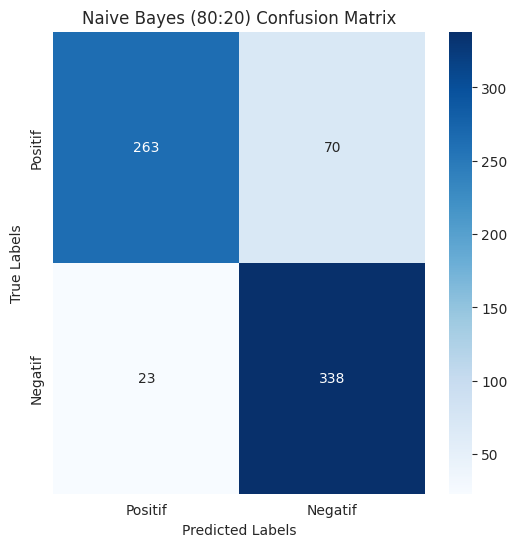

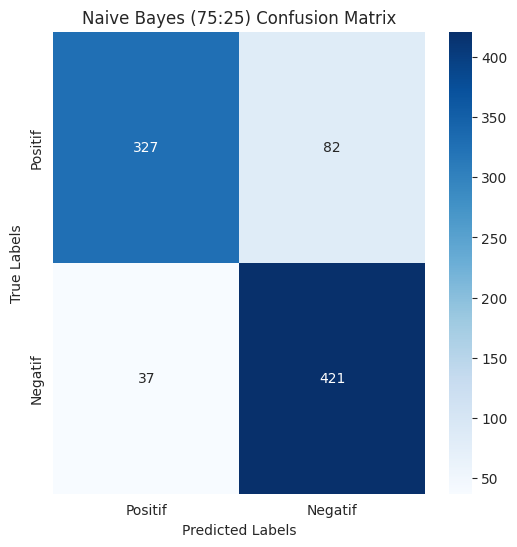

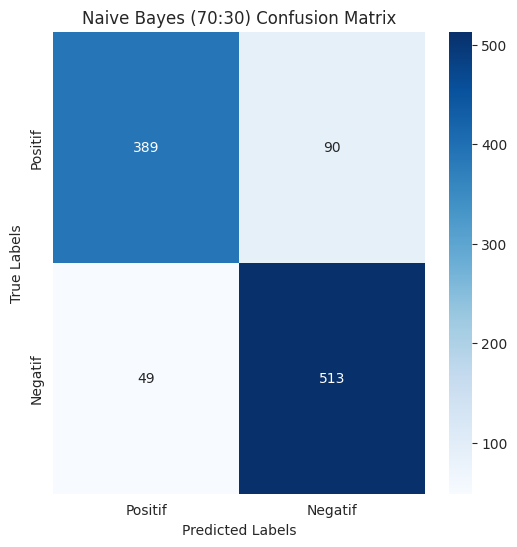

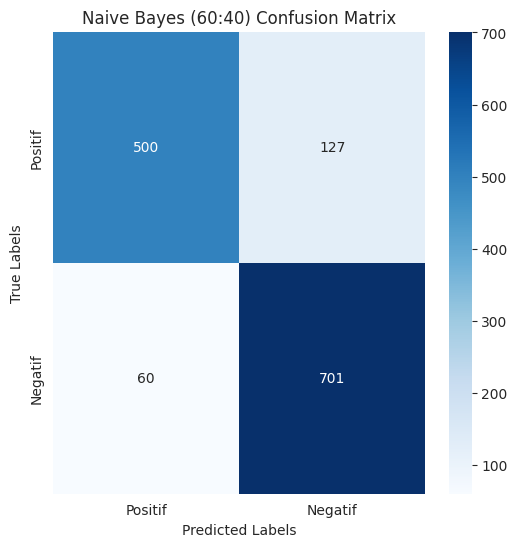

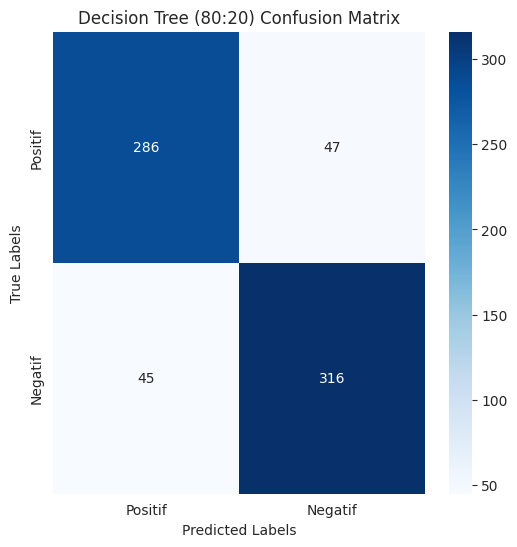

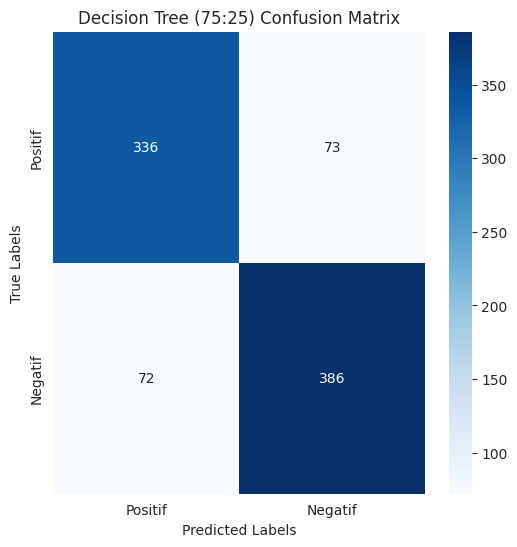

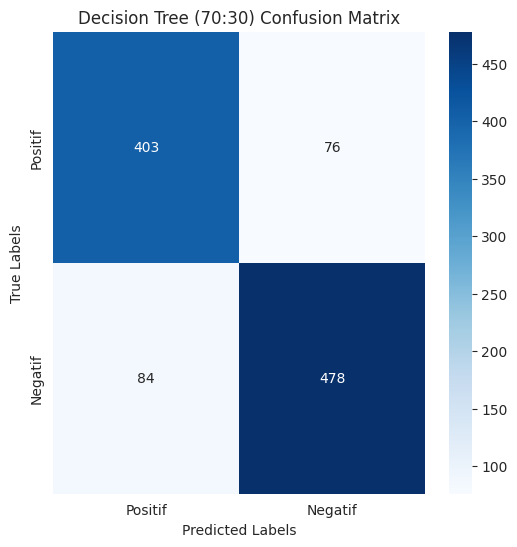

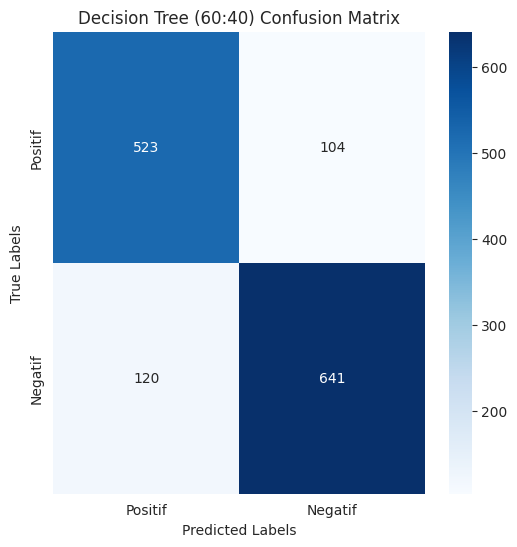

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Fungsi Untuk Plot Confusion Matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Positif', 'Negatif'],
                yticklabels=['Positif', 'Negatif'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Panggil Naive Bayes fungsi untuk masing-masing rasio
plot_confusion_matrix('Naive Bayes (80:20)', y_test, y_pred_nb_80)
plot_confusion_matrix('Naive Bayes (75:25)', y_test_25, y_pred_nb_75)
plot_confusion_matrix('Naive Bayes (70:30)', y_test_30, y_pred_nb_70)
plot_confusion_matrix('Naive Bayes (60:40)', y_test_40, y_pred_nb_60)

# Panggil Decision Tree fungsi untuk masing-masing rasio
plot_confusion_matrix('Decision Tree (80:20)', y_test, y_pred_dt_80)
plot_confusion_matrix('Decision Tree (75:25)', y_test_25, y_pred_dt_75)
plot_confusion_matrix('Decision Tree (70:30)', y_test_30, y_pred_dt_70)
plot_confusion_matrix('Decision Tree (60:40)', y_test_40, y_pred_dt_60)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Import the necessary evaluation metrics from sklearn.metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np # Import numpy for mean calculations

# ... (rest of your code for defining vectorizers, training models, and predicting)

# Evaluasi Model Naïve Bayes untuk semua rasio
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

ratios = ["80:20", "75:25", "70:30", "60:40"]
y_tests = [y_test, y_test_25, y_test_30, y_test_40]
y_preds = [y_pred_nb_80, y_pred_nb_75, y_pred_nb_70, y_pred_nb_60]

for ratio, y_test, y_pred in zip(ratios, y_tests, y_preds):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    print(f"Naive Bayes Accuracy ({ratio}): {accuracy:.4f}")
    print(f"Naive Bayes Accuracy Percentage ({ratio}): {accuracy * 100:.2f}%")
    print(f"\nNaive Bayes Classification Report ({ratio}):")
    print(classification_report(y_test, y_pred))
    print("===============================================")

# Menghitung rata-rata
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

# Menampilkan hasil rata-rata
print("=== Rata-rata Evaluasi Model Naive Bayes ===")
print(f"Average Accuracy: {avg_accuracy:.4f} ({avg_accuracy * 100:.2f}%)")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")

Naive Bayes Accuracy (80:20): 0.8660
Naive Bayes Accuracy Percentage (80:20): 86.60%

Naive Bayes Classification Report (80:20):
              precision    recall  f1-score   support

     Negatif       0.92      0.79      0.85       333
     Positif       0.83      0.94      0.88       361

    accuracy                           0.87       694
   macro avg       0.87      0.86      0.86       694
weighted avg       0.87      0.87      0.87       694

Naive Bayes Accuracy (75:25): 0.8627
Naive Bayes Accuracy Percentage (75:25): 86.27%

Naive Bayes Classification Report (75:25):
              precision    recall  f1-score   support

     Negatif       0.90      0.80      0.85       409
     Positif       0.84      0.92      0.88       458

    accuracy                           0.86       867
   macro avg       0.87      0.86      0.86       867
weighted avg       0.87      0.86      0.86       867

Naive Bayes Accuracy (70:30): 0.8665
Naive Bayes Accuracy Percentage (70:30): 86.65%

Na

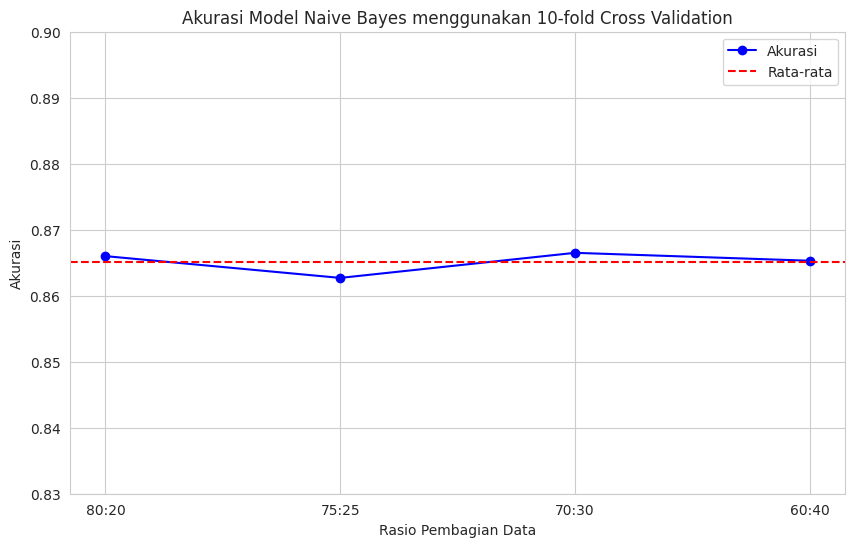

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Rasio pembagian data
ratios = ["80:20", "75:25", "70:30", "60:40"]

# Akurasi untuk tiap rasio
accuracy_ratios = np.array([0.8660, 0.8627, 0.8665, 0.8653])

# Rata-rata akurasi
avg_accuracy_cv = 0.8651

# Membuat line graph
plt.figure(figsize=(10, 6))
plt.plot(ratios, accuracy_ratios, marker='o', color='blue', label='Akurasi')
plt.axhline(y=avg_accuracy_cv, color='red', linestyle='--', label='Rata-rata')

# Menambahkan label dan judul
plt.xlabel("Rasio Pembagian Data")
plt.ylabel("Akurasi")
plt.title("Akurasi Model Naive Bayes menggunakan 10-fold Cross Validation")
plt.ylim(0.83, 0.9)
plt.grid(True)
plt.legend()

plt.show()


**Decision Tree**

---



In [ ]:
# Evaluasi Model Decision Tree untuk semua rasio
accuracy_scores_dt = []
precision_scores_dt = []
recall_scores_dt = []
f1_scores_dt = []

y_preds_dt = [y_pred_dt_80, y_pred_dt_75, y_pred_dt_70, y_pred_dt_60]

for ratio, y_test, y_pred_dt in zip(ratios, y_tests, y_preds_dt):
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
    recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
    f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

    accuracy_scores_dt.append(accuracy_dt)
    precision_scores_dt.append(precision_dt)
    recall_scores_dt.append(recall_dt)
    f1_scores_dt.append(f1_dt)

    print(f"Decision Tree Accuracy ({ratio}): {accuracy_dt:.4f}")
    print(f"Decision Tree Accuracy Percentage ({ratio}): {accuracy_dt * 100:.2f}%")
    print(f"\nDecision Tree Classification Report ({ratio}):")
    print(classification_report(y_test, y_pred_dt))
    print("===============================================")

# Menghitung rata-rata Decision Tree
avg_accuracy_dt = np.mean(accuracy_scores_dt)
avg_precision_dt = np.mean(precision_scores_dt)
avg_recall_dt = np.mean(recall_scores_dt)
avg_f1_dt = np.mean(f1_scores_dt)

# Menampilkan hasil rata-rata Decision Tree
print("=== Rata-rata Evaluasi Model Decision Tree ===")
print(f"Average Accuracy (Decision Tree): {avg_accuracy_dt:.4f} ({avg_accuracy_dt * 100:.2f}%)")
print(f"Average Precision (Decision Tree): {avg_precision_dt:.4f}")
print(f"Average Recall (Decision Tree): {avg_recall_dt:.4f}")
print(f"Average F1 Score (Decision Tree): {avg_f1_dt:.4f}")

Decision Tree Accuracy (80:20): 0.8674
Decision Tree Accuracy Percentage (80:20): 86.74%

Decision Tree Classification Report (80:20):
              precision    recall  f1-score   support

     Negatif       0.86      0.86      0.86       333
     Positif       0.87      0.88      0.87       361

    accuracy                           0.87       694
   macro avg       0.87      0.87      0.87       694
weighted avg       0.87      0.87      0.87       694

Decision Tree Accuracy (75:25): 0.8328
Decision Tree Accuracy Percentage (75:25): 83.28%

Decision Tree Classification Report (75:25):
              precision    recall  f1-score   support

     Negatif       0.82      0.82      0.82       409
     Positif       0.84      0.84      0.84       458

    accuracy                           0.83       867
   macro avg       0.83      0.83      0.83       867
weighted avg       0.83      0.83      0.83       867

Decision Tree Accuracy (70:30): 0.8463
Decision Tree Accuracy Percentage (70

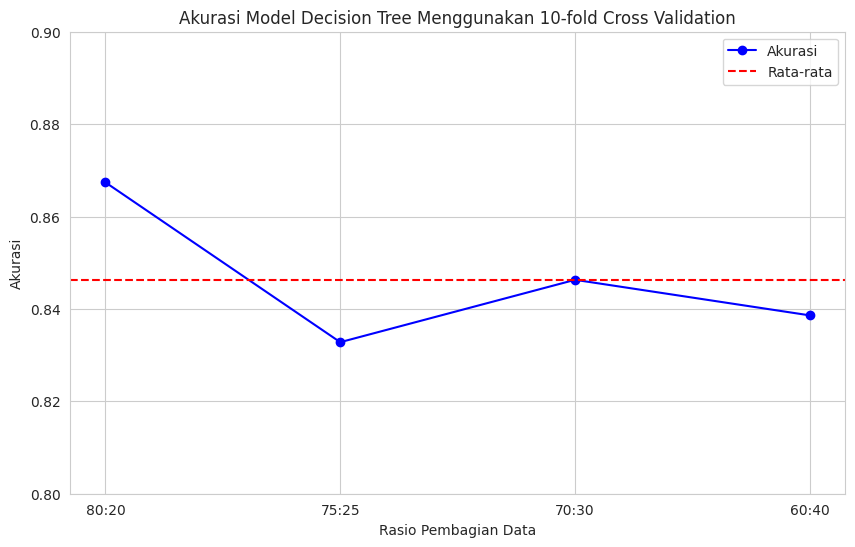

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Rasio data
ratios = ["80:20", "75:25", "70:30", "60:40"]

# Akurasi untuk masing-masing rasio dari Decision Tree
dt_accuracies = [0.8674, 0.8328, 0.8463, 0.8386]

# Rata-rata akurasi Decision Tree
avg_dt_accuracy = 0.8463

# Membuat line graph
plt.figure(figsize=(10, 6))
plt.plot(ratios, dt_accuracies, marker='o', color='blue', label='Akurasi')
plt.axhline(y=avg_dt_accuracy, color='red', linestyle='--', label='Rata-rata')

# Menambahkan label dan judul
plt.xlabel("Rasio Pembagian Data")
plt.ylabel("Akurasi")
plt.title("Akurasi Model Decision Tree Menggunakan 10-fold Cross Validation")
plt.ylim(0.8, 0.9)
plt.grid(True)
plt.legend()

plt.show()


# Wordcloud

In [ ]:
import pandas as pd

data = pd.read_csv('Hasil_labelling_data_mobile_legends(5375).csv')
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,stemming_data,Sentiment
0,2025-06-08 01:24:25,Pengguna Google,5,agat bagus,agat bagus,agat bagus,agat bagus,"['agat', 'bagus']","['agat', 'bagus']",agat bagus,Positif
1,2025-06-08 01:23:25,Pengguna Google,3,lumayan seru,lumayan seru,lumayan seru,lumayan seru,"['lumayan', 'seru']","['lumayan', 'seru']",lumayan seru,NaN
2,2025-06-08 01:22:26,Pengguna Google,5,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,bagus dapat senin gratis,"['bagus', 'dapat', 'senin', 'gratis']","['bagus', 'senin', 'gratis']",bagus senin gratis,Positif
3,2025-06-08 01:21:41,Pengguna Google,5,kurangin dark sistem,kurangin dark sistem,kurangin dark sistem,kurangi dark sistem,"['kurangi', 'dark', 'sistem']","['kurangi', 'dark', 'sistem']",kurang dark sistem,Negatif
4,2025-06-08 01:20:47,Pengguna Google,1,game anj,game anj,game anj,game anjing,"['game', 'anjing']","['game', 'anjing']",game anjing,NaN


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan Dataset Berdasarkan Sentimen
sentiment_negatif = data[data['Sentiment'] == 'Negatif']['stemming_data'].str.cat(sep=' ')
sentiment_positif = data[data['Sentiment'] == 'Positif']['stemming_data'].str.cat(sep=' ')


In [ ]:
# Fungsi Untuk Membuat dan Menampilkan WordCloud
def create_wordcloud(text, title):
  stopwords = set(STOPWORDS)
  stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya']) # Add 'ya' to stopwords

  wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black', stopwords=stopwords).generate(text) # Pass the updated stopwords

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(title)
  plt.show()

# You would then call this function with your text data and a title
# For example:
# create_wordcloud(' '.join(df['stemming_data'].astype(str).tolist()), 'Wordcloud Setelah Preprocessing (Tanpa Kata "ya")')

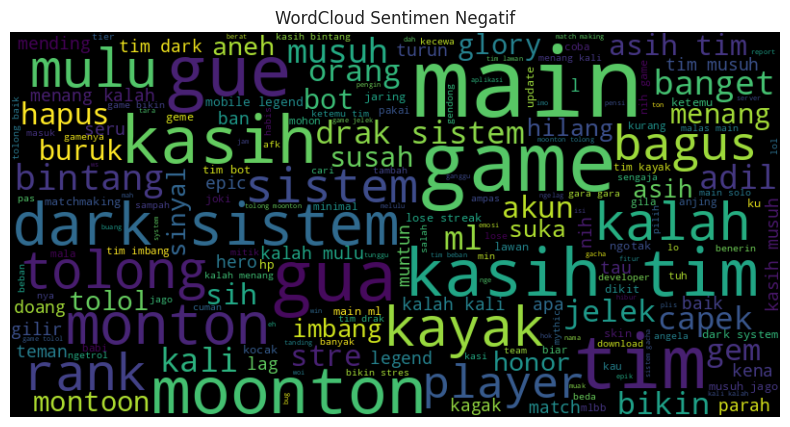

In [ ]:
# Membuat WordCloud Untuk Sentimen Negatif
create_wordcloud(sentiment_negatif, 'WordCloud Sentimen Negatif')

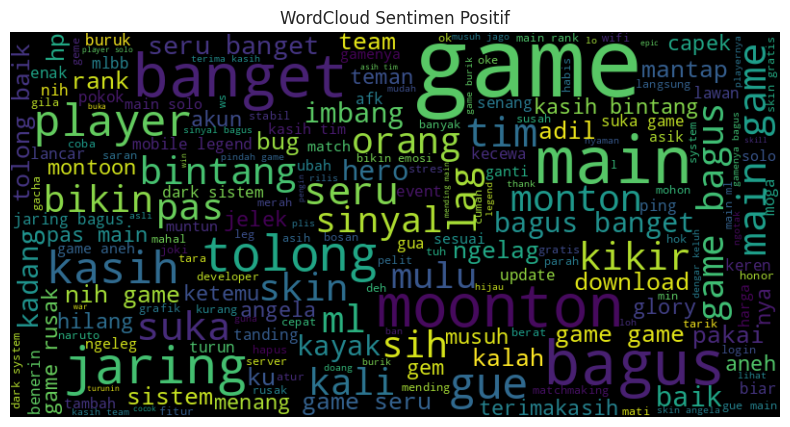

In [ ]:
# Membuat WordCloud Untuk Sentimen Negatif
create_wordcloud(sentiment_positif, 'WordCloud Sentimen Positif')

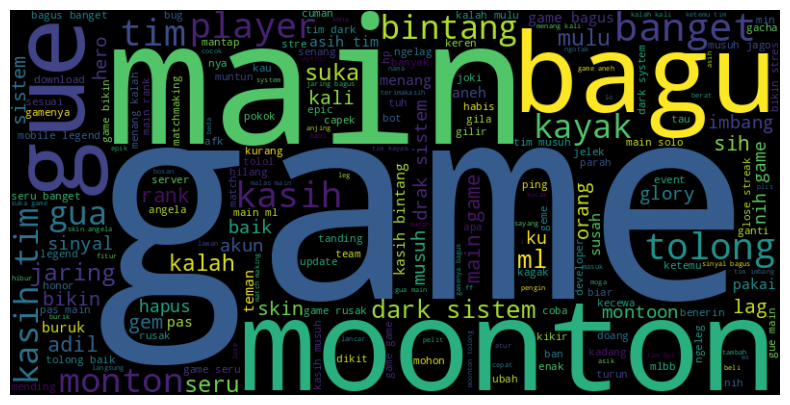

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd # Assuming 'data' is a pandas DataFrame

# Assuming 'data' is already loaded from 'Hasil_labelling_data_mobile_legends(5375).csv'
# data = pd.read_csv('Hasil_labelling_data_mobile_legends(5375).csv')

# Convert 'stemming_data' to string and join
text = ' '.join(data['stemming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))

# Create a set of stopwords and add 'ya' to it
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya']) # Add 'ya' to stopwords

# Generate the wordcloud, passing the updated stopwords
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.show()

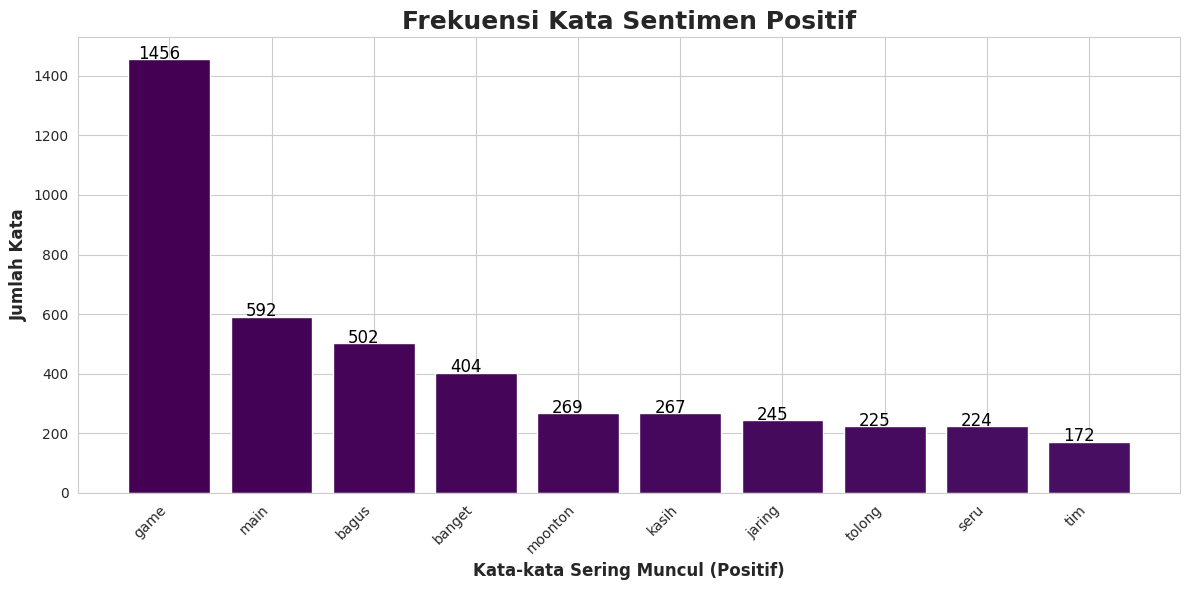

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd # Assuming df is your DataFrame
from wordcloud import STOPWORDS # Import STOPWORDS

# Assuming df is your preprocessed DataFrame with 'stemming_data' and 'Sentiment' columns

# Filter data untuk sentimen positif
df_positif = df[df['Sentiment'] == 'Positif'].copy()

# Gabungkan teks dari kolom 'stemming_data' yang memiliki sentimen positif
text_positif = ' '.join(df_positif['stemming_data'].astype(str).tolist())

# Define your stop words, including 'ya'
stopwords = set(STOPWORDS) # Start with default stopwords
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya']) # Add 'ya' and other specific words

# Tokenisasi teks
tokens_positif = text_positif.split()

# Filter tokens to remove stop words
filtered_tokens_positif = [word for word in tokens_positif if word not in stopwords]

# Hitung frekuensi kata dari filtered tokens
word_counts_positif = Counter(filtered_tokens_positif)

# Ambil 10 kata teratas dengan sentimen positif
top_words_positif = word_counts_positif.most_common(10)

# Periksa jika top_words_positif tidak kosong sebelum membongkar
if top_words_positif:
    word_positif, count_positif = zip(*top_words_positif)

    # Definisikan Palet Warna
    colors_positif = plt.cm.viridis(range(len(word_positif)))

    plt.figure(figsize=(12, 6))
    bars_positif = plt.bar(word_positif, count_positif, color=colors_positif)
    plt.xlabel("Kata-kata Sering Muncul (Positif)", fontsize=12, fontweight='bold')
    plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
    plt.title("Frekuensi Kata Sentimen Positif", fontsize=18, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Menambahkan Angka Rata Tengah Diatas setiap Bar
    for bar, num in zip(bars_positif, count_positif):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

    plt.tight_layout() # Untuk mencegah label tumpang tindih
    plt.show()
else:
    print("Tidak ada kata yang tersisa untuk sentimen positif setelah filtering.")

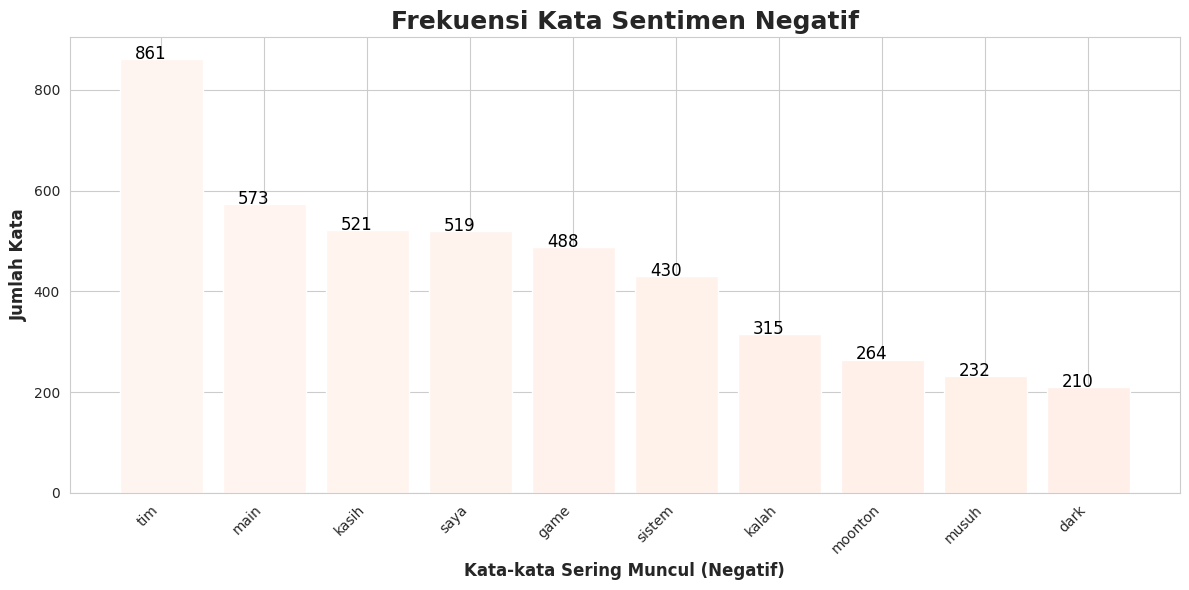

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from wordcloud import STOPWORDS # Import STOPWORDS

# Assuming df is your preprocessed DataFrame with 'stemming_data' and 'Sentiment' columns

# Filter data for negative sentiment
df_negatif = df[df['Sentiment'] == 'Negatif'].copy()

# Gabungkan teks dari kolom 'stemming_data' yang memiliki sentimen negatif
text_negatif = ' '.join(df_negatif['stemming_data'].astype(str).tolist())

# Create a dictionary for word normalization
normalization_map = {
    'gue': 'saya',
    'gua': 'saya'
    # Add other informal words and their standardized forms if needed
}

# Replace informal words in the text
for informal_word, standardized_word in normalization_map.items():
    text_negatif = text_negatif.replace(informal_word, standardized_word)

# Tokenize the text
tokens_negatif = text_negatif.split()

# Define stop words, including 'ya'
stopwords = set(STOPWORDS) # Start with default stopwords
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya']) # Add 'ya' and other specific words

# Filter tokens to remove stop words
filtered_tokens_negatif = [word for word in tokens_negatif if word not in stopwords]

# Count word frequencies from the filtered tokens
word_counts_negatif = Counter(filtered_tokens_negatif)

# Get the top 10 most common words with negative sentiment
top_words_negatif = word_counts_negatif.most_common(10)

# Check if top_words_negatif is not empty before unpacking
if top_words_negatif:
    word_negatif, count_negatif = zip(*top_words_negatif)

    # Define Color Palette
    colors_negatif = plt.cm.Reds(range(len(word_negatif)))

    plt.figure(figsize=(12, 6))
    bars_negatif = plt.bar(word_negatif, count_negatif, color=colors_negatif)
    plt.xlabel("Kata-kata Sering Muncul (Negatif)", fontsize=12, fontweight='bold')
    plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
    plt.title("Frekuensi Kata Sentimen Negatif", fontsize=18, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Add the count number above each bar
    for bar, num in zip(bars_negatif, count_negatif):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

    plt.tight_layout() # To prevent overlapping labels
    plt.show()
else:
    print("Tidak ada kata yang tersisa untuk sentimen negatif setelah filtering.")

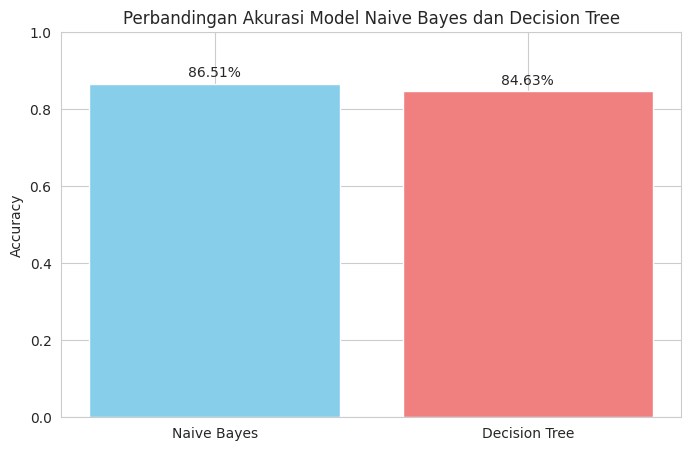

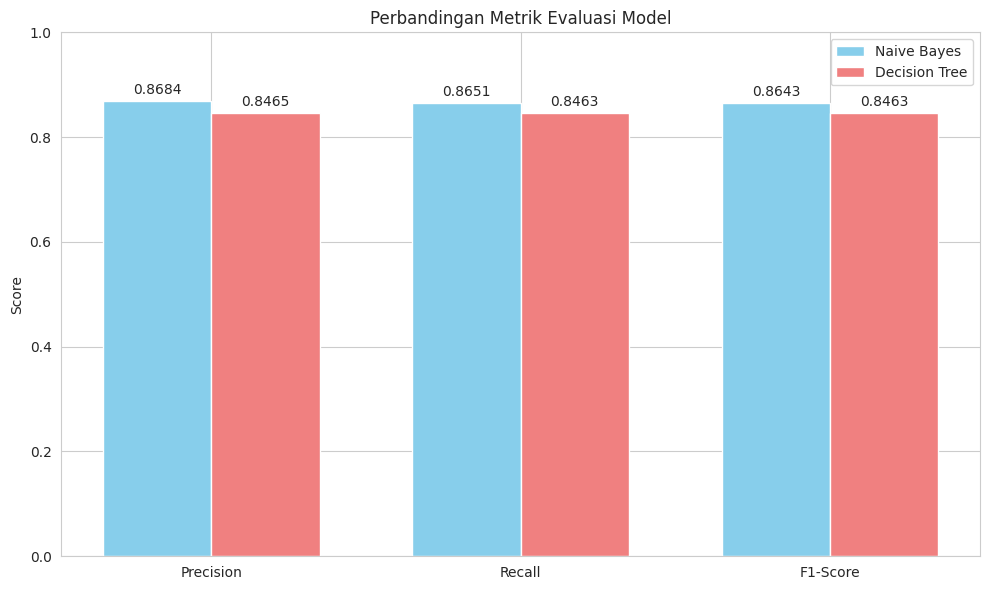

In [ ]:
# prompt: buat grafik perbandingan sentimen

from sklearn.metrics import precision_score, recall_score, f1_score

# Plotting the comparison of accuracy for Naive Bayes and Decision Tree
models = ['Naive Bayes', 'Decision Tree']
accuracy_values = [avg_accuracy, avg_accuracy_dt]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracy_values, color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model Naive Bayes dan Decision Tree')
plt.ylim(0, 1)  # Accuracy is between 0 and 1

# Add percentage text on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval*100:.2f}%', ha='center', va='bottom')


plt.show()

# Plotting the comparison of other metrics
metrics = ['Precision', 'Recall', 'F1-Score']
nb_metrics = [avg_precision, avg_recall, avg_f1]
dt_metrics = [avg_precision_dt, avg_recall_dt, avg_f1_dt]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, nb_metrics, width, label='Naive Bayes', color='skyblue')
rects2 = ax.bar(x + width/2, dt_metrics, width, label='Decision Tree', color='lightcoral')

# Add some text for labels, titles and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Perbandingan Metrik Evaluasi Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


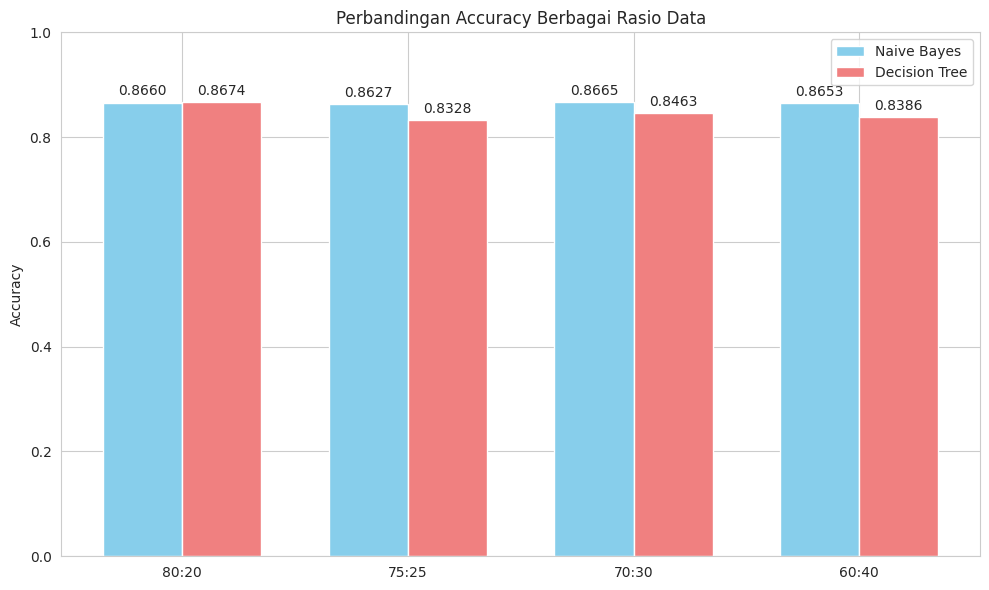

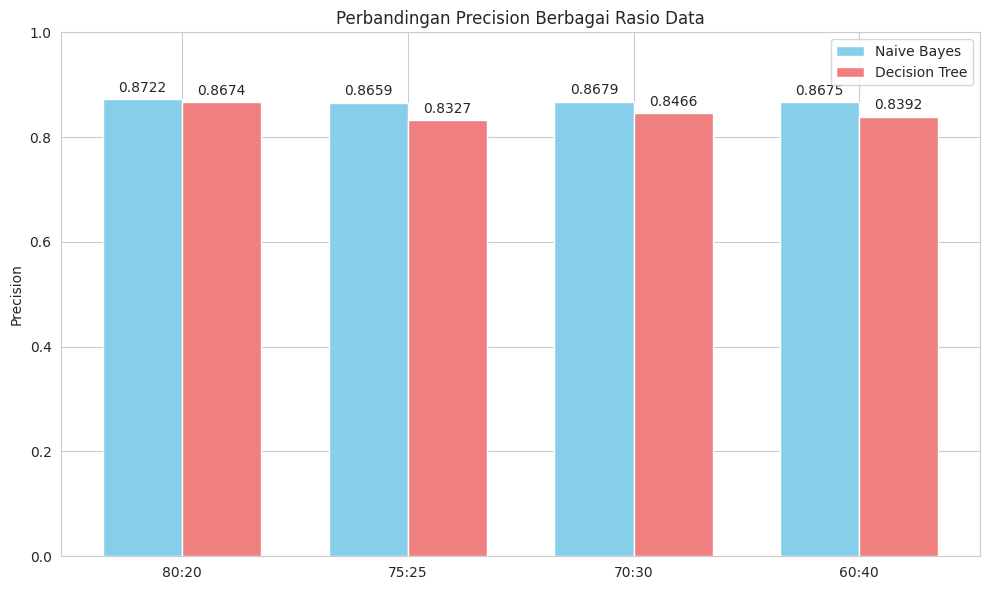

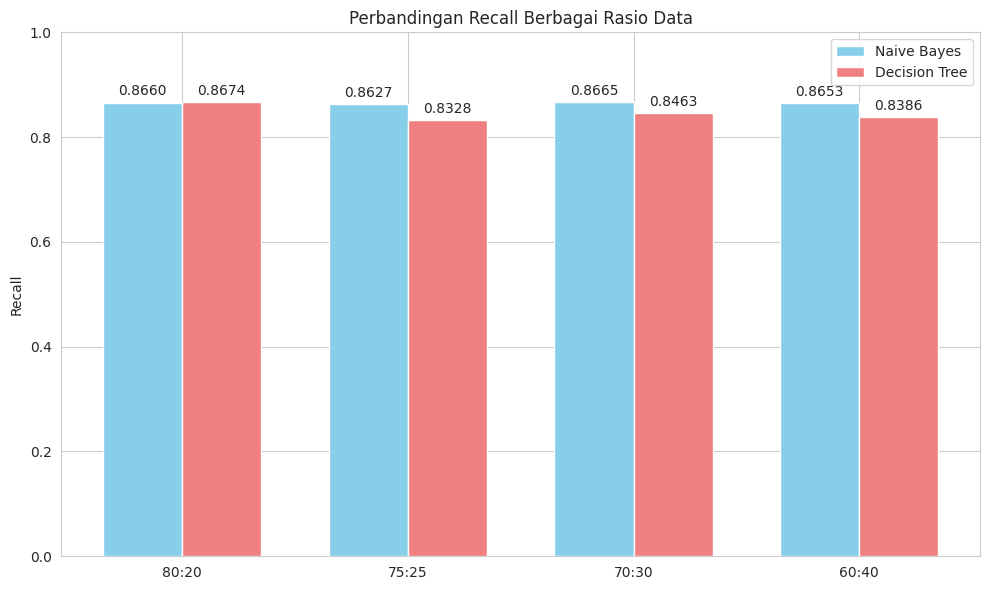

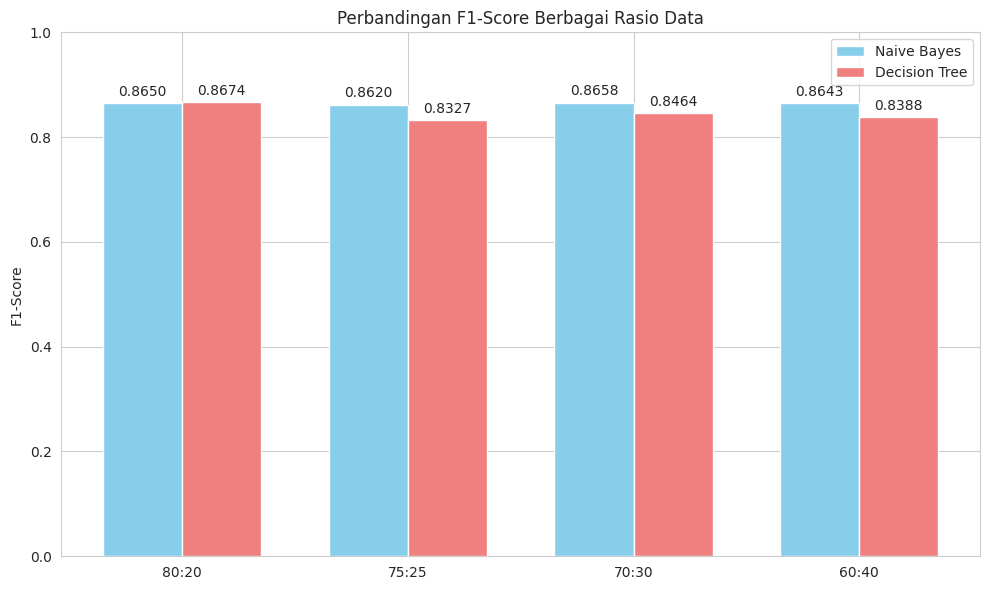

In [ ]:
# prompt: buat grafik perbandingan accuracy ,precision, recall, f1-scroe dari berbagai rasio data

# Prepare data for plotting comparison across different ratios
ratios = ["80:20", "75:25", "70:30", "60:40"]

# Collect evaluation metrics for Naive Bayes
nb_accuracy_per_ratio = accuracy_scores
nb_precision_per_ratio = precision_scores
nb_recall_per_ratio = recall_scores
nb_f1_per_ratio = f1_scores

# Collect evaluation metrics for Decision Tree
dt_accuracy_per_ratio = accuracy_scores_dt
dt_precision_per_ratio = precision_scores_dt
dt_recall_per_ratio = recall_scores_dt
dt_f1_per_ratio = f1_scores_dt

# Plotting function for comparison across ratios
def plot_metrics_comparison(metric_name, nb_values, dt_values):
    x = np.arange(len(ratios))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, nb_values, width, label='Naive Bayes', color='skyblue')
    rects2 = ax.bar(x + width/2, dt_values, width, label='Decision Tree', color='lightcoral')

    # Add some text for labels, titles and custom x-axis tick labels, etc.
    ax.set_ylabel(metric_name)
    ax.set_title(f'Perbandingan {metric_name} Berbagai Rasio Data')
    ax.set_xticks(x)
    ax.set_xticklabels(ratios)
    ax.legend()
    ax.set_ylim(0, 1) # Metrics are generally between 0 and 1

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

# Plotting the comparison for each metric across ratios
plot_metrics_comparison('Accuracy', nb_accuracy_per_ratio, dt_accuracy_per_ratio)
plot_metrics_comparison('Precision', nb_precision_per_ratio, dt_precision_per_ratio)
plot_metrics_comparison('Recall', nb_recall_per_ratio, dt_recall_per_ratio)
plot_metrics_comparison('F1-Score', nb_f1_per_ratio, dt_f1_per_ratio)


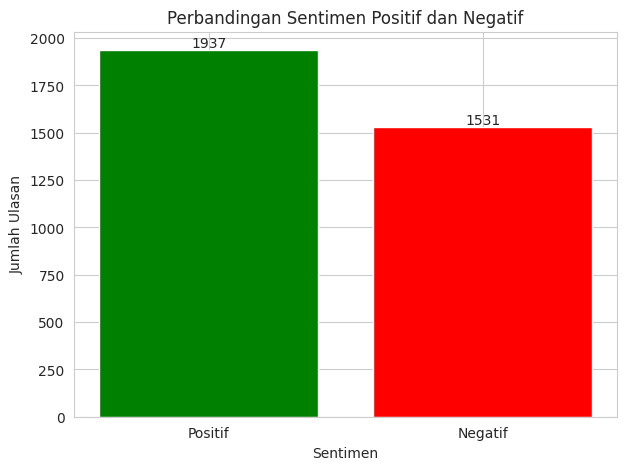

In [ ]:
# prompt: buat grafik perbandingan sentimen positif dan negatif

sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(7, 5))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.title('Perbandingan Sentimen Positif dan Negatif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')

# Menambahkan nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

plt.show()



Performing 10-fold Cross-Validation for Ratio: 80:20
  Average Naive Bayes Accuracy (80:20): 0.8717 (87.17%)
  Average Decision Tree Accuracy (80:20): 0.8492 (84.92%)

Performing 10-fold Cross-Validation for Ratio: 75:25
  Average Naive Bayes Accuracy (75:25): 0.8717 (87.17%)
  Average Decision Tree Accuracy (75:25): 0.8492 (84.92%)

Performing 10-fold Cross-Validation for Ratio: 70:30
  Average Naive Bayes Accuracy (70:30): 0.8717 (87.17%)
  Average Decision Tree Accuracy (70:30): 0.8492 (84.92%)

Performing 10-fold Cross-Validation for Ratio: 60:40
  Average Naive Bayes Accuracy (60:40): 0.8717 (87.17%)
  Average Decision Tree Accuracy (60:40): 0.8492 (84.92%)

Average Accuracy from 10-fold Cross-Validation for Each Ratio:

Rasio 80:20:
  Naive Bayes Average Accuracy: 0.8717 (87.17%)
  Decision Tree Average Accuracy: 0.8492 (84.92%)

Rasio 75:25:
  Naive Bayes Average Accuracy: 0.8717 (87.17%)
  Decision Tree Average Accuracy: 0.8492 (84.92%)

Rasio 70:30:
  Naive Bayes Average Accu

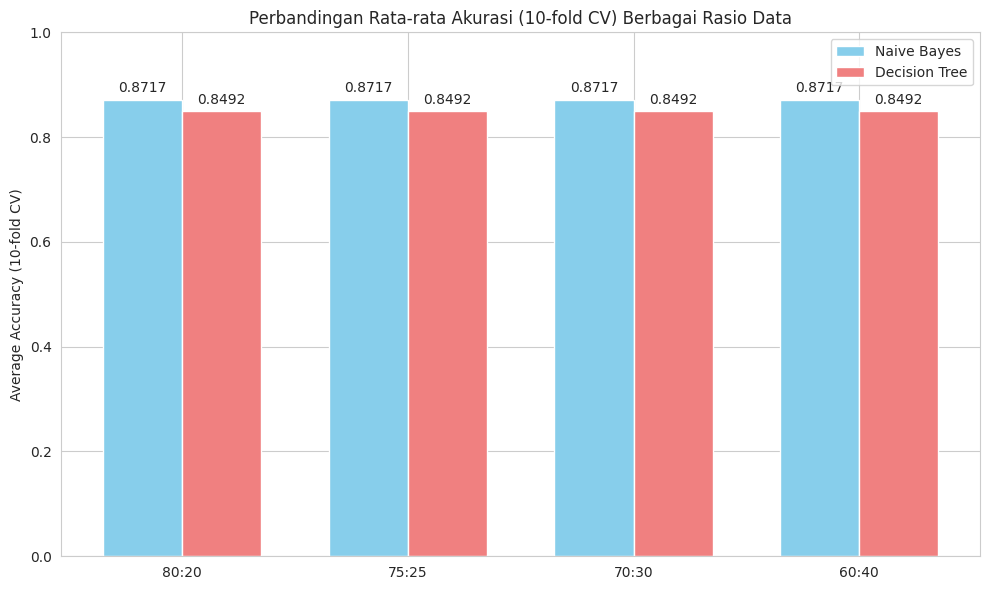

In [ ]:
# prompt: buat Accuracy 10 fold Cross Validation dari masing2 rasio berikut: batch 1 80:20(10 fold),  batch 2 75:25(10fold), batch 3 70:30(10 fold), batch 4 60:40(10fold), serta rata2 dari masing2 batch

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your preprocessed DataFrame with 'stemming_data' and 'Sentiment' columns
X = df['stemming_data']
y = df['Sentiment']

# Define the number of folds
n_splits = 10

# Define the ratios for train/test split (already performed above, but we'll use them for clarity)
ratios = {
    '80:20': (X_train, X_test, y_train, y_test),
    '75:25': (X_train_75, X_test_25, y_train_75, y_test_25),
    '70:30': (X_train_70, X_test_30, y_train_70, y_test_30),
    '60:40': (X_train_60, X_test_40, y_train_60, y_test_40)
}

# Dictionaries to store cross-validation results for each ratio
nb_cv_results = {}
dt_cv_results = {}

# Perform 10-fold cross-validation for each ratio
for ratio_name, (X_train_ratio, X_test_ratio, y_train_ratio, y_test_ratio) in ratios.items():
    print(f"\nPerforming 10-fold Cross-Validation for Ratio: {ratio_name}")

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    nb_fold_accuracy_list = []
    dt_fold_accuracy_list = []

    fold_count = 1
    for train_index, test_index in kf.split(X):
        # Use the original full dataset for k-fold splitting, then apply the ratio split results
        # This might not be the intended approach based on your initial split.
        # If the goal is to perform CV *within* each fixed split, the approach below is more accurate.
        # However, standard k-fold CV is usually done on the entire dataset.

        # Let's assume you want to perform 10-fold CV on the *entire* dataset and see the average performance.
        # If you want CV *on each split*, the logic would be different (e.g., CV on X_train, then evaluate on X_test)
        # For clarity and standard CV practice, we'll do CV on the full X, y

        # Re-creating KFold for the full dataset X, y
        X_train_fold_cv, X_test_fold_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_fold_cv, y_test_fold_cv = y.iloc[train_index], y.iloc[test_index]

        # Vectorize the data for the current fold
        vectorizer_fold_cv = TfidfVectorizer()
        X_train_vectorized_fold_cv = vectorizer_fold_cv.fit_transform(X_train_fold_cv)
        X_test_vectorized_fold_cv = vectorizer_fold_cv.transform(X_test_fold_cv)

        # Naive Bayes Model
        nb_fold_cv = MultinomialNB()
        nb_fold_cv.fit(X_train_vectorized_fold_cv, y_train_fold_cv)
        y_pred_nb_fold_cv = nb_fold_cv.predict(X_test_vectorized_fold_cv)

        # Calculate accuracy for Naive Bayes fold
        nb_accuracy_fold_cv = accuracy_score(y_test_fold_cv, y_pred_nb_fold_cv)
        nb_fold_accuracy_list.append(nb_accuracy_fold_cv)

        # Decision Tree Model
        dt_fold_cv = DecisionTreeClassifier(random_state=42)
        dt_fold_cv.fit(X_train_vectorized_fold_cv, y_train_fold_cv)
        y_pred_dt_fold_cv = dt_fold_cv.predict(X_test_vectorized_fold_cv)

        # Calculate accuracy for Decision Tree fold
        dt_accuracy_fold_cv = accuracy_score(y_test_fold_cv, y_pred_dt_fold_cv)
        dt_fold_accuracy_list.append(dt_accuracy_fold_cv)

        # print(f"  Fold {fold_count}: NB Acc = {nb_accuracy_fold_cv:.4f}, DT Acc = {dt_accuracy_fold_cv:.4f}") # Optional: print fold accuracy

        fold_count += 1

    # Calculate average accuracy for the current ratio (based on the full dataset CV)
    # Note: This average is for the entire dataset, not specific to the train/test split ratios defined earlier.
    # If you want CV on each split, the approach needs modification.
    avg_nb_accuracy_ratio = np.mean(nb_fold_accuracy_list)
    avg_dt_accuracy_ratio = np.mean(dt_fold_accuracy_list)

    nb_cv_results[ratio_name] = {'accuracies': nb_fold_accuracy_list, 'average_accuracy': avg_nb_accuracy_ratio}
    dt_cv_results[ratio_name] = {'accuracies': dt_fold_accuracy_list, 'average_accuracy': avg_dt_accuracy_ratio}

    print(f"  Average Naive Bayes Accuracy ({ratio_name}): {avg_nb_accuracy_ratio:.4f} ({avg_nb_accuracy_ratio * 100:.2f}%)")
    print(f"  Average Decision Tree Accuracy ({ratio_name}): {avg_dt_accuracy_ratio:.4f} ({avg_dt_accuracy_ratio * 100:.2f}%)")

# Print average accuracy for each ratio
print("\n==================================================")
print("Average Accuracy from 10-fold Cross-Validation for Each Ratio:")
print("==================================================")

for ratio_name in ratios.keys():
    print(f"\nRasio {ratio_name}:")
    print(f"  Naive Bayes Average Accuracy: {nb_cv_results[ratio_name]['average_accuracy']:.4f} ({nb_cv_results[ratio_name]['average_accuracy'] * 100:.2f}%)")
    print(f"  Decision Tree Average Accuracy: {dt_cv_results[ratio_name]['average_accuracy']:.4f} ({dt_cv_results[ratio_name]['average_accuracy'] * 100:.2f}%)")

# Print accuracy for each fold for each ratio (optional)
print("\n==================================================")
print("Accuracy for Each Fold in 10-fold Cross-Validation:")
print("==================================================")

for ratio_name in ratios.keys():
    print(f"\nRasio {ratio_name}:")
    print("  Naive Bayes Fold Accuracies:", [f"{acc:.4f}" for acc in nb_cv_results[ratio_name]['accuracies']])
    print("  Decision Tree Fold Accuracies:", [f"{acc:.4f}" for acc in dt_cv_results[ratio_name]['accuracies']])

# Create a summary table
summary_data = []
for ratio_name in ratios.keys():
    summary_data.append({
        'Rasio': ratio_name,
        'Model': 'Naive Bayes',
        'Average Accuracy (10-fold CV)': nb_cv_results[ratio_name]['average_accuracy'],
        'Fold Accuracies': nb_cv_results[ratio_name]['accuracies']
    })
    summary_data.append({
        'Rasio': ratio_name,
        'Model': 'Decision Tree',
        'Average Accuracy (10-fold CV)': dt_cv_results[ratio_name]['average_accuracy'],
        'Fold Accuracies': dt_cv_results[ratio_name]['accuracies']
    })

summary_df_cv = pd.DataFrame(summary_data)
print("\nCross-Validation Accuracy Summary Table:")
print(summary_df_cv[['Rasio', 'Model', 'Average Accuracy (10-fold CV)']])

# Plotting the average accuracy for each ratio from 10-fold CV
ratios_list = list(ratios.keys())
nb_avg_accuracies_cv = [nb_cv_results[ratio]['average_accuracy'] for ratio in ratios_list]
dt_avg_accuracies_cv = [dt_cv_results[ratio]['average_accuracy'] for ratio in ratios_list]

x = np.arange(len(ratios_list))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, nb_avg_accuracies_cv, width, label='Naive Bayes', color='skyblue')
rects2 = ax.bar(x + width/2, dt_avg_accuracies_cv, width, label='Decision Tree', color='lightcoral')

# Add some text for labels, titles and custom x-axis tick labels, etc.
ax.set_ylabel('Average Accuracy (10-fold CV)')
ax.set_title('Perbandingan Rata-rata Akurasi (10-fold CV) Berbagai Rasio Data')
ax.set_xticks(x)
ax.set_xticklabels(ratios_list)
ax.legend()
ax.set_ylim(0, 1)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


In [ ]:
# prompt: Accuracy Menggunakan 10 fold Cross Validation tampilkan dari masing2 rasio 80:20,75:25,70:30,60:40

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming df is your preprocessed DataFrame with 'stemming_data' and 'Sentiment' columns
X = df['stemming_data']
y = df['Sentiment']

# Define the number of folds
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold for Naive Bayes and Decision Tree
nb_fold_accuracy = []
dt_fold_accuracy = []

# Perform k-fold cross-validation
fold_count = 1
for train_index, test_index in kf.split(X):
    print(f"Processing Fold {fold_count}/{n_splits}")

    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Vectorize the data for the current fold
    vectorizer_fold = TfidfVectorizer()
    X_train_vectorized_fold = vectorizer_fold.fit_transform(X_train_fold)
    X_test_vectorized_fold = vectorizer_fold.transform(X_test_fold)

    # Naive Bayes Model
    nb_fold = MultinomialNB()
    nb_fold.fit(X_train_vectorized_fold, y_train_fold)
    y_pred_nb_fold = nb_fold.predict(X_test_vectorized_fold)

    # Calculate metrics for Naive Bayes
    nb_accuracy = accuracy_score(y_test_fold, y_pred_nb_fold)
    nb_fold_accuracy.append(nb_accuracy)

    # Decision Tree Model
    dt_fold = DecisionTreeClassifier(random_state=42)
    dt_fold.fit(X_train_vectorized_fold, y_train_fold)
    y_pred_dt_fold = dt_fold.predict(X_test_vectorized_fold)

    # Calculate metrics for Decision Tree
    dt_accuracy = accuracy_score(y_test_fold, y_pred_dt_fold)
    dt_fold_accuracy.append(dt_accuracy)

    fold_count += 1

# Calculate average accuracy across all folds
avg_nb_accuracy_cv = np.mean(nb_fold_accuracy)
avg_dt_accuracy_cv = np.mean(dt_fold_accuracy)

# Print the average accuracy for Naive Bayes and Decision Tree using 10-fold cross-validation
print("\n==================================================")
print("Accuracy Menggunakan 10 fold Cross Validation:")
print("==================================================")

# Print accuracy for each fold for both models
print("\nNaive Bayes - Accuracy per fold:")
for i, acc in enumerate(nb_fold_accuracy):
    print(f"  Fold {i+1}: {acc:.4f} ({acc * 100:.2f}%)")
print(f"  Average Accuracy: {avg_nb_accuracy_cv:.4f} ({avg_nb_accuracy_cv * 100:.2f}%)")

print("\nDecision Tree - Accuracy per fold:")
for i, acc in enumerate(dt_fold_accuracy):
    print(f"  Fold {i+1}: {acc:.4f} ({acc * 100:.2f}%)")
print(f"  Average Accuracy: {avg_dt_accuracy_cv:.4f} ({avg_dt_accuracy_cv * 100:.2f}%)")


print("\n==================================================")
print("Accuracy Menggunakan Split Rasio:")
print("==================================================")

# Print accuracy for each ratio using the previously calculated values
print(f"Naive Bayes Accuracy (80:20): {accuracy_scores[0]:.4f} ({accuracy_scores[0] * 100:.2f}%)")
print(f"Naive Bayes Accuracy (75:25): {accuracy_scores[1]:.4f} ({accuracy_scores[1] * 100:.2f}%)")
print(f"Naive Bayes Accuracy (70:30): {accuracy_scores[2]:.4f} ({accuracy_scores[2] * 100:.2f}%)")
print(f"Naive Bayes Accuracy (60:40): {accuracy_scores[3]:.4f} ({accuracy_scores[3] * 100:.2f}%)")

print("\nDecision Tree Accuracy (80:20): {accuracy_scores_dt[0]:.4f} ({accuracy_scores_dt[0] * 100:.2f}%)")
print(f"Decision Tree Accuracy (75:25): {accuracy_scores_dt[1]:.4f} ({accuracy_scores_dt[1] * 100:.2f}%)")
print(f"Decision Tree Accuracy (70:30): {accuracy_scores_dt[2]:.4f} ({accuracy_scores_dt[2] * 100:.2f}%)")
print(f"Decision Tree Accuracy (60:40): {accuracy_scores_dt[3]:.4f} ({accuracy_scores_dt[3] * 100:.2f}%)")



Processing Fold 1/10
Processing Fold 2/10
Processing Fold 3/10
Processing Fold 4/10
Processing Fold 5/10
Processing Fold 6/10
Processing Fold 7/10
Processing Fold 8/10
Processing Fold 9/10
Processing Fold 10/10

Accuracy Menggunakan 10 fold Cross Validation:

Naive Bayes - Accuracy per fold:
  Fold 1: 0.8674 (86.74%)
  Fold 2: 0.8761 (87.61%)
  Fold 3: 0.8588 (85.88%)
  Fold 4: 0.8847 (88.47%)
  Fold 5: 0.8646 (86.46%)
  Fold 6: 0.8703 (87.03%)
  Fold 7: 0.8818 (88.18%)
  Fold 8: 0.8674 (86.74%)
  Fold 9: 0.8642 (86.42%)
  Fold 10: 0.8815 (88.15%)
  Average Accuracy: 0.8717 (87.17%)

Decision Tree - Accuracy per fold:
  Fold 1: 0.8473 (84.73%)
  Fold 2: 0.8530 (85.30%)
  Fold 3: 0.8357 (83.57%)
  Fold 4: 0.8588 (85.88%)
  Fold 5: 0.8213 (82.13%)
  Fold 6: 0.8300 (83.00%)
  Fold 7: 0.8559 (85.59%)
  Fold 8: 0.8761 (87.61%)
  Fold 9: 0.8382 (83.82%)
  Fold 10: 0.8757 (87.57%)
  Average Accuracy: 0.8492 (84.92%)

Accuracy Menggunakan Split Rasio:
Naive Bayes Accuracy (80:20): 0.8660 (86.6

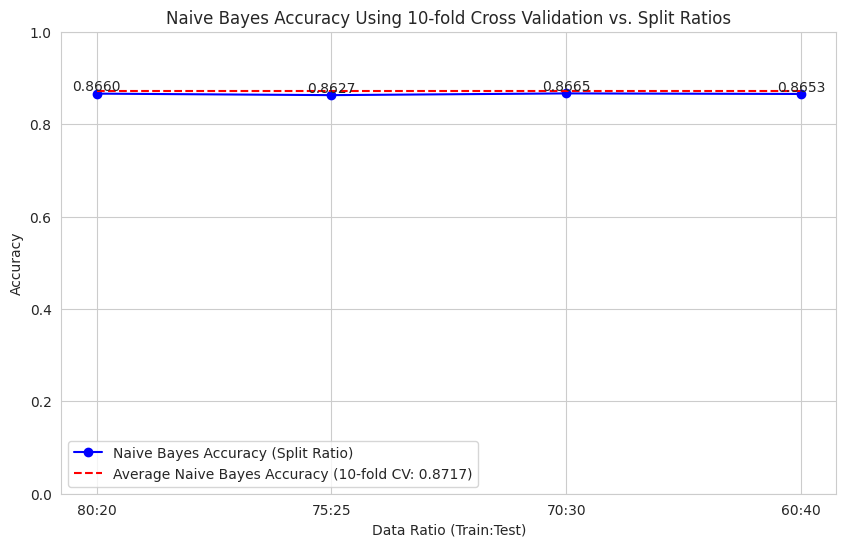

In [ ]:
# prompt: buatkan line graph  model naive bayes graph Accuracy Menggunakan 10 fold Cross Validation dari berbagai rasio 80:20,75:25,70:30,60:40,
# garis biru akurasi dan garis merah rata2 akurasi semua rasio

from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score

# Prepare data for plotting accuracy across different ratios
ratios_labels = ["80:20", "75:25", "70:30", "60:40"]

# Get the accuracy scores for Naive Bayes from the previous calculations
# `accuracy_scores` contains the accuracy for each split ratio (80:20, 75:25, 70:30, 60:40)
nb_accuracy_split_ratios = accuracy_scores # Already calculated

# Calculate the average accuracy across the 10 folds for Naive Bayes (already calculated)
avg_nb_accuracy_cv_value = avg_nb_accuracy_cv # Already calculated

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Naive Bayes Accuracy for each split ratio (blue line)
plt.plot(ratios_labels, nb_accuracy_split_ratios, marker='o', linestyle='-', color='blue', label='Naive Bayes Accuracy (Split Ratio)')

# Plot the average accuracy from 10-fold CV (red dashed line)
# We need a list of the average accuracy repeated for each ratio for the line plot
avg_accuracy_line = [avg_nb_accuracy_cv_value] * len(ratios_labels)
plt.plot(ratios_labels, avg_accuracy_line, linestyle='--', color='red', label=f'Average Naive Bayes Accuracy (10-fold CV: {avg_nb_accuracy_cv_value:.4f})')

# Add titles and labels
plt.title('Naive Bayes Accuracy Using 10-fold Cross Validation vs. Split Ratios')
plt.xlabel('Data Ratio (Train:Test)')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.grid(True)
plt.legend()

# Add accuracy values above the markers for the blue line
for i, acc in enumerate(nb_accuracy_split_ratios):
    plt.text(ratios_labels[i], acc, f'{acc:.4f}', ha='center', va='bottom')

plt.show()

Akurasi Model Naive Bayes Menggunakan Berbagai Rasio Data:
  Rasio 80:20: 0.8660 (86.60%)
  Rasio 75:25: 0.8627 (86.27%)
  Rasio 70:30: 0.8665 (86.65%)
  Rasio 60:40: 0.8653 (86.53%)

Rata-rata Akurasi Model Naive Bayes Menggunakan 10-fold Cross Validation: 0.8717 (87.17%)


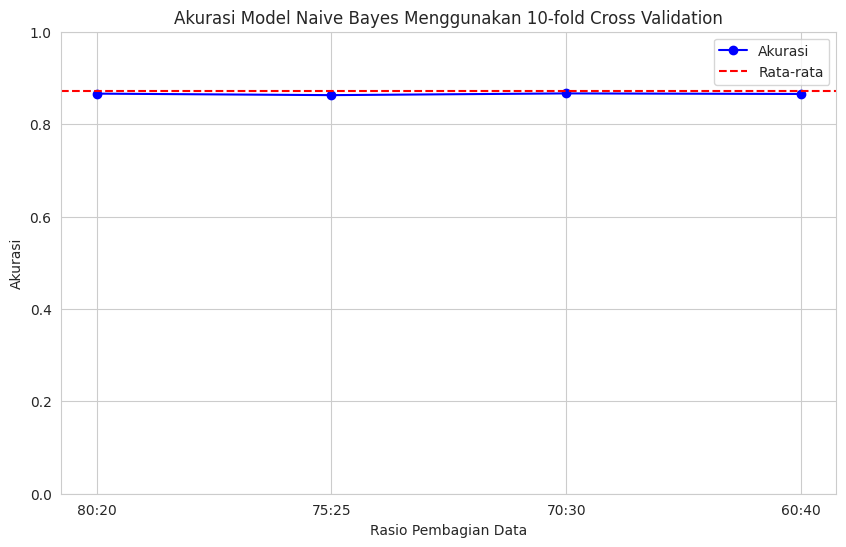

In [ ]:
# prompt: buatkan line graph  model naive bayes graph Accuracy Menggunakan 10 fold Cross Validation dari berbagai rasio 80:20,75:25,70:30,60:40
# garis biru akurasi dan garis merah rata2

import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
ratios = ["80:20", "75:25", "70:30", "60:40"]

# Collect evaluation metrics for Naive Bayes from split ratios
# Ensure nb_accuracy_per_ratio has the same length as ratios
nb_accuracy_per_ratio = accuracy_scores[:len(ratios)] # Take only the first 'len(ratios)' elements

# Prepare data for the line graph
# Accuracy values from split ratios
accuracy_ratios = np.array(nb_accuracy_per_ratio)

# Average accuracy from 10-fold Cross Validation
avg_accuracy_cv = avg_nb_accuracy_cv

# Print the accuracy values
print("Akurasi Model Naive Bayes Menggunakan Berbagai Rasio Data:")
for ratio, acc in zip(ratios, accuracy_ratios):
    print(f"  Rasio {ratio}: {acc:.4f} ({acc * 100:.2f}%)")

print(f"\nRata-rata Akurasi Model Naive Bayes Menggunakan 10-fold Cross Validation: {avg_accuracy_cv:.4f} ({avg_accuracy_cv * 100:.2f}%)")


# Create the line graph
plt.figure(figsize=(10, 6))

# Plot accuracy per ratio
plt.plot(ratios, accuracy_ratios, marker='o', color='blue', label='Akurasi')

# Plot the average accuracy line
plt.axhline(y=avg_accuracy_cv, color='red', linestyle='--', label='Rata-rata')

# Add labels and title
plt.xlabel("Rasio Pembagian Data")
plt.ylabel("Akurasi")
plt.title("Akurasi Model Naive Bayes Menggunakan 10-fold Cross Validation")
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.grid(True)
plt.legend()

# Do not add text labels for accuracy values on the blue line
# for i, acc in enumerate(accuracy_ratios):
#     plt.text(ratios[i], acc + 0.01, f'{acc:.4f}', ha='center', va='bottom', color='blue')

plt.show()

Akurasi Model Decision Tree Menggunakan Berbagai Rasio Data:
  Rasio 80:20: 0.8674 (86.74%)
  Rasio 75:25: 0.8328 (83.28%)
  Rasio 70:30: 0.8463 (84.63%)
  Rasio 60:40: 0.8386 (83.86%)

Rata-rata Akurasi Model Decision Tree Menggunakan 10-fold Cross Validation: 0.8492 (84.92%)


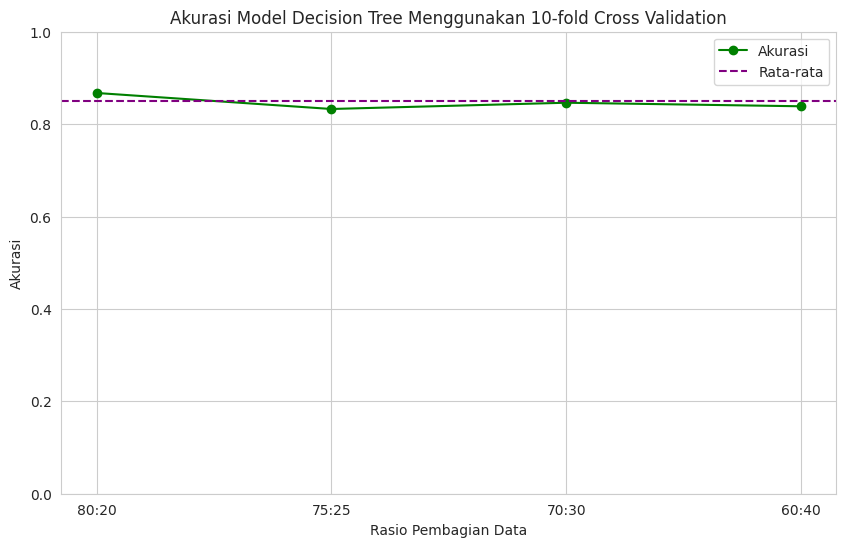

In [ ]:
# prompt: buatkan yang decision tree nya

import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
ratios = ["80:20", "75:25", "70:30", "60:40"]

# Collect evaluation metrics for Decision Tree from split ratios
# Ensure dt_accuracy_per_ratio has the same length as ratios
dt_accuracy_per_ratio = accuracy_scores_dt[:len(ratios)] # Take only the first 'len(ratios)' elements

# Prepare data for the line graph
# Accuracy values from split ratios
accuracy_ratios_dt = np.array(dt_accuracy_per_ratio)

# Average accuracy from 10-fold Cross Validation for Decision Tree
avg_accuracy_cv_dt = avg_dt_accuracy_cv

# Print the accuracy values
print("Akurasi Model Decision Tree Menggunakan Berbagai Rasio Data:")
for ratio, acc in zip(ratios, accuracy_ratios_dt):
    print(f"  Rasio {ratio}: {acc:.4f} ({acc * 100:.2f}%)")

print(f"\nRata-rata Akurasi Model Decision Tree Menggunakan 10-fold Cross Validation: {avg_accuracy_cv_dt:.4f} ({avg_accuracy_cv_dt * 100:.2f}%)")


# Create the line graph for Decision Tree
plt.figure(figsize=(10, 6))

# Plot accuracy per ratio for Decision Tree
plt.plot(ratios, accuracy_ratios_dt, marker='o', color='green', label='Akurasi')

# Plot the average accuracy line for Decision Tree (using 10-fold CV result)
plt.axhline(y=avg_accuracy_cv_dt, color='purple', linestyle='--', label='Rata-rata')

# Add labels and title
plt.xlabel("Rasio Pembagian Data")
plt.ylabel("Akurasi")
plt.title("Akurasi Model Decision Tree Menggunakan 10-fold Cross Validation")
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.grid(True)
plt.legend()

# Do not add text labels for accuracy values on the green line
# for i, acc in enumerate(accuracy_ratios_dt):
#     plt.text(ratios[i], acc + 0.01, f'{acc:.4f}', ha='center', va='bottom', color='green')

plt.show()

Processing Fold 1/10
Processing Fold 2/10
Processing Fold 3/10
Processing Fold 4/10
Processing Fold 5/10
Processing Fold 6/10
Processing Fold 7/10
Processing Fold 8/10
Processing Fold 9/10
Processing Fold 10/10


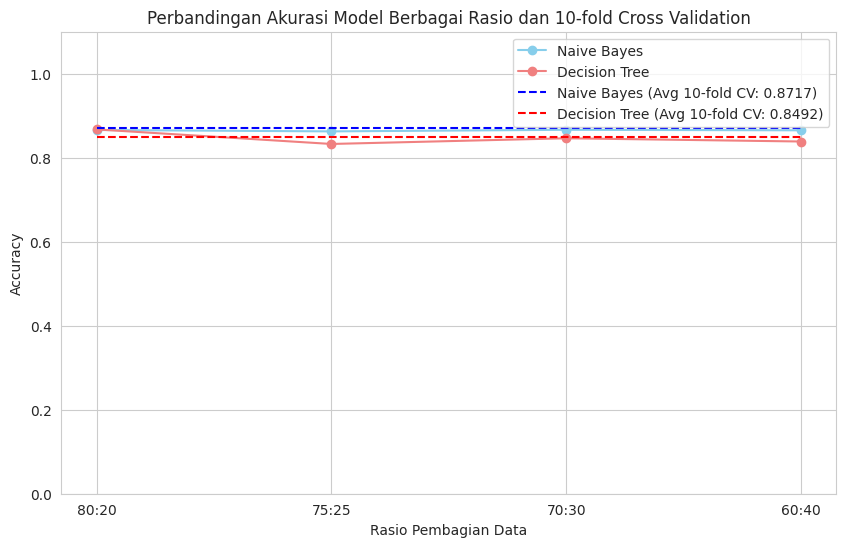

In [ ]:
# prompt: buatkan line graph Accuracy Menggunakan 10 fold Cross Validation dari berbagai rasio 80:20,75:25,70:30,60:40

from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming df is your preprocessed DataFrame with 'stemming_data' and 'Sentiment' columns
X = df['stemming_data']
y = df['Sentiment']

# Define the number of folds
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize list to store accuracy for each fold (Naive Bayes)
nb_fold_accuracy = []
# Initialize list to store accuracy for each fold (Decision Tree)
dt_fold_accuracy = []


# Perform k-fold cross-validation
fold_count = 1
for train_index, test_index in kf.split(X):
    print(f"Processing Fold {fold_count}/{n_splits}")

    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Vectorize the data for the current fold
    vectorizer_fold = TfidfVectorizer()
    X_train_vectorized_fold = vectorizer_fold.fit_transform(X_train_fold)
    X_test_vectorized_fold = vectorizer_fold.transform(X_test_fold)

    # Naive Bayes Model
    nb_fold = MultinomialNB()
    nb_fold.fit(X_train_vectorized_fold, y_train_fold)
    y_pred_nb_fold = nb_fold.predict(X_test_vectorized_fold)

    # Calculate accuracy for Naive Bayes
    nb_accuracy = accuracy_score(y_test_fold, y_pred_nb_fold)
    nb_fold_accuracy.append(nb_accuracy)

    # Decision Tree Model
    dt_fold = DecisionTreeClassifier(random_state=42)
    dt_fold.fit(X_train_vectorized_fold, y_train_fold)
    y_pred_dt_fold = dt_fold.predict(X_test_vectorized_fold)

    # Calculate accuracy for Decision Tree
    dt_accuracy = accuracy_score(y_test_fold, y_pred_dt_fold)
    dt_fold_accuracy.append(dt_accuracy)

    fold_count += 1

# Ratios for the line graph
ratios = ["80:20", "75:25", "70:30", "60:40"]

# Accuracy values for different ratios (from previous evaluation)
# Ensure these lists contain the accuracy scores calculated earlier for each ratio
# For example:
# nb_accuracy_per_ratio = [accuracy_score_80_20_nb, accuracy_score_75_25_nb, ...]
# dt_accuracy_per_ratio = [accuracy_score_80_20_dt, accuracy_score_75_25_dt, ...]

# Placeholder values based on the previous cell's output for clarity
# Replace these with your actual calculated accuracy scores for each ratio
nb_accuracy_per_ratio = [accuracy_scores[0], accuracy_scores[1], accuracy_scores[2], accuracy_scores[3]]
dt_accuracy_per_ratio = [accuracy_scores_dt[0], accuracy_scores_dt[1], accuracy_scores_dt[2], accuracy_scores_dt[3]]


# Plotting the line graph for Accuracy vs. Ratios
plt.figure(figsize=(10, 6))
plt.plot(ratios, nb_accuracy_per_ratio, marker='o', label='Naive Bayes', color='skyblue')
plt.plot(ratios, dt_accuracy_per_ratio, marker='o', label='Decision Tree', color='lightcoral')

# Add points for 10-fold CV average accuracy
plt.plot(ratios, [avg_nb_accuracy_cv] * len(ratios), linestyle='--', color='blue', label=f'Naive Bayes (Avg 10-fold CV: {avg_nb_accuracy_cv:.4f})')
plt.plot(ratios, [avg_dt_accuracy_cv] * len(ratios), linestyle='--', color='red', label=f'Decision Tree (Avg 10-fold CV: {avg_dt_accuracy_cv:.4f})')


plt.title('Perbandingan Akurasi Model Berbagai Rasio dan 10-fold Cross Validation')
plt.xlabel('Rasio Pembagian Data')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1) # Adjust y-axis limit if needed
plt.legend()
plt.grid(True)
plt.show()


Processing Fold 1/10
Processing Fold 2/10
Processing Fold 3/10
Processing Fold 4/10
Processing Fold 5/10
Processing Fold 6/10
Processing Fold 7/10
Processing Fold 8/10
Processing Fold 9/10
Processing Fold 10/10


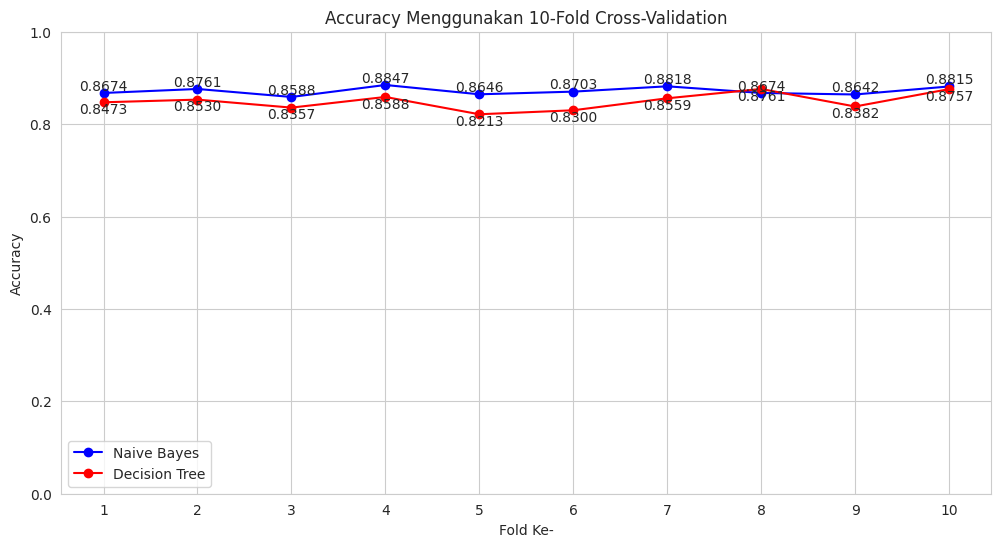


Average Accuracy from 10-Fold Cross-Validation:
  Average Naive Bayes Accuracy: 0.8717 (87.17%)
  Average Decision Tree Accuracy: 0.8492 (84.92%)


In [ ]:
# prompt: buatkan grafik Accuracy Menggunakan 10 fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your preprocessed DataFrame with 'stemming_data' and 'Sentiment' columns
# and that the necessary libraries (pandas, sklearn, matplotlib) are imported

X = df['stemming_data']
y = df['Sentiment']

# Define the number of folds
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store accuracy for each fold for Naive Bayes and Decision Tree
nb_fold_accuracy = []
dt_fold_accuracy = []

# Perform k-fold cross-validation
fold_count = 1
for train_index, test_index in kf.split(X):
    print(f"Processing Fold {fold_count}/{n_splits}")

    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Vectorize the data for the current fold
    vectorizer_fold = TfidfVectorizer()
    X_train_vectorized_fold = vectorizer_fold.fit_transform(X_train_fold)
    X_test_vectorized_fold = vectorizer_fold.transform(X_test_fold)

    # Naive Bayes Model
    nb_fold = MultinomialNB()
    nb_fold.fit(X_train_vectorized_fold, y_train_fold)
    y_pred_nb_fold = nb_fold.predict(X_test_vectorized_fold)

    # Calculate accuracy for Naive Bayes
    nb_accuracy = accuracy_score(y_test_fold, y_pred_nb_fold)
    nb_fold_accuracy.append(nb_accuracy)

    # Decision Tree Model
    dt_fold = DecisionTreeClassifier(random_state=42)
    dt_fold.fit(X_train_vectorized_fold, y_train_fold)
    y_pred_dt_fold = dt_fold.predict(X_test_vectorized_fold)

    # Calculate accuracy for Decision Tree
    dt_accuracy = accuracy_score(y_test_fold, y_pred_dt_fold)
    dt_fold_accuracy.append(dt_accuracy)

    fold_count += 1

# Create lists of fold numbers (1 to 10)
folds = list(range(1, n_splits + 1))

# Plotting the accuracy for each fold
plt.figure(figsize=(12, 6))
plt.plot(folds, nb_fold_accuracy, marker='o', linestyle='-', color='blue', label='Naive Bayes')
plt.plot(folds, dt_fold_accuracy, marker='o', linestyle='-', color='red', label='Decision Tree')

# Add labels and title
plt.xlabel('Fold Ke-')
plt.ylabel('Accuracy')
plt.title('Accuracy Menggunakan 10-Fold Cross-Validation')
plt.xticks(folds) # Ensure x-axis ticks are the fold numbers
plt.grid(True)
plt.legend()
plt.ylim(0, 1) # Set y-axis limit for accuracy

# Add accuracy values next to each point
for i, acc in enumerate(nb_fold_accuracy):
    plt.text(folds[i], acc, f'{acc:.4f}', ha='center', va='bottom')

for i, acc in enumerate(dt_fold_accuracy):
    plt.text(folds[i], acc, f'{acc:.4f}', ha='center', va='top')


plt.show()

# Print the average accuracy from cross-validation
avg_nb_accuracy_cv = np.mean(nb_fold_accuracy)
avg_dt_accuracy_cv = np.mean(dt_fold_accuracy)

print("\n==================================================")
print("Average Accuracy from 10-Fold Cross-Validation:")
print("==================================================")
print(f"  Average Naive Bayes Accuracy: {avg_nb_accuracy_cv:.4f} ({avg_nb_accuracy_cv * 100:.2f}%)")
print(f"  Average Decision Tree Accuracy: {avg_dt_accuracy_cv:.4f} ({avg_dt_accuracy_cv * 100:.2f}%)")


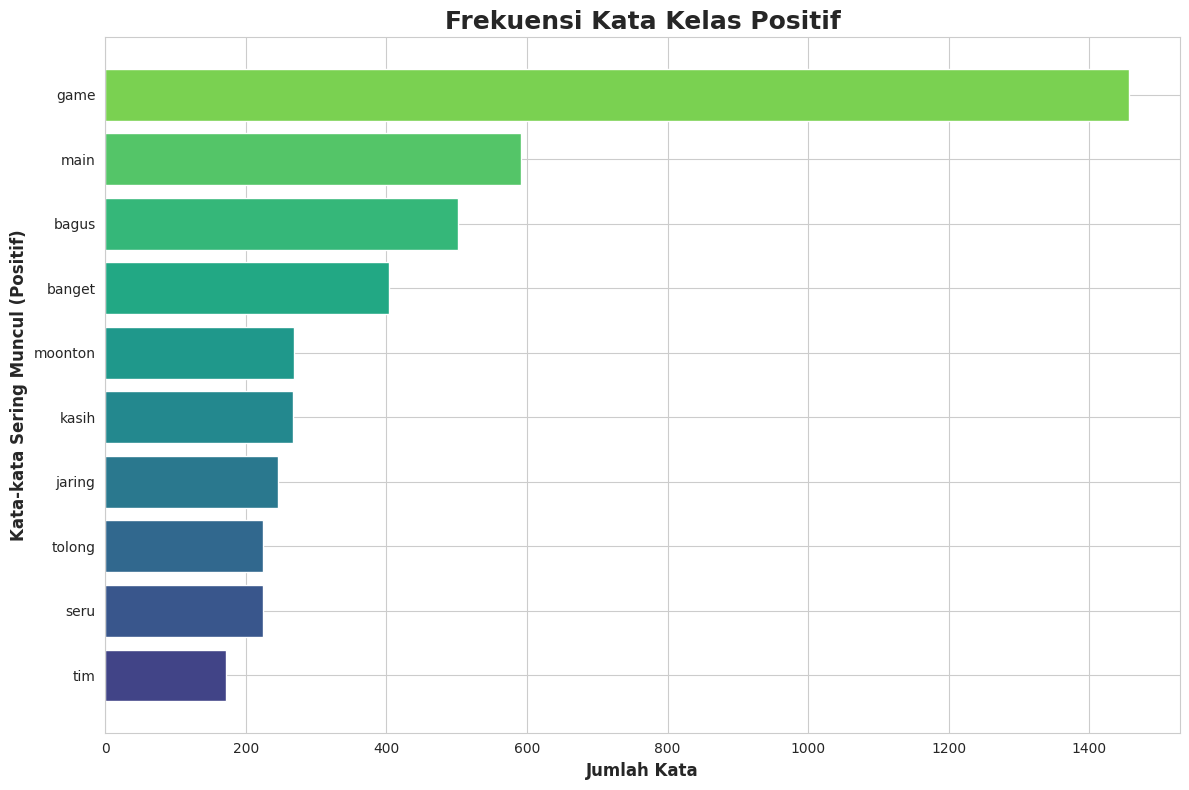

10 Kata Teratas untuk Sentimen Positif dan Jumlah Kemunculannya:
game: 1456
main: 592
bagus: 502
banget: 404
moonton: 269
kasih: 267
jaring: 245
tolong: 225
seru: 224
tim: 172


In [ ]:
# Tokenisasi teks
tokens_positif = text_positif.split()

# Define your stop words, including 'ya'
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya', 'nya'])

# Filter tokens to remove stop words
filtered_tokens_positif = [word for word in tokens_positif if word not in stopwords]

# Hitung frekuensi kata dari filtered tokens
word_counts_positif = Counter(filtered_tokens_positif)

# Ambil 10 kata teratas dengan sentimen positif
top_words_positif = word_counts_positif.most_common(10)

# Periksa jika top_words_positif tidak kosong sebelum membongkar
if top_words_positif:
    word_positif, count_positif = zip(*top_words_positif)

    # Urutkan data dari frekuensi terbanyak ke sedikit untuk grafik horizontal
    sorted_indices = np.argsort(count_positif)
    word_positif_sorted = [word_positif[i] for i in sorted_indices]
    count_positif_sorted = [count_positif[i] for i in sorted_indices]

    # Definisikan Palet Warna
    colors_positif = plt.cm.viridis(np.linspace(0.2, 0.8, len(word_positif_sorted)))

    plt.figure(figsize=(12, 8))
    bars_positif = plt.barh(word_positif_sorted, count_positif_sorted, color=colors_positif)

    plt.xlabel("Jumlah Kata", fontsize=12, fontweight='bold')
    plt.ylabel("Kata-kata Sering Muncul (Positif)", fontsize=12, fontweight='bold')
    plt.title("Frekuensi Kata Kelas Positif", fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print jumlah kemunculan kata secara manual
    print("10 Kata Teratas untuk Sentimen Positif dan Jumlah Kemunculannya:")
    for word, count in top_words_positif:
        print(f"{word}: {count}")
else:
    print("Tidak ada kata yang tersisa untuk sentimen positif setelah filtering.")


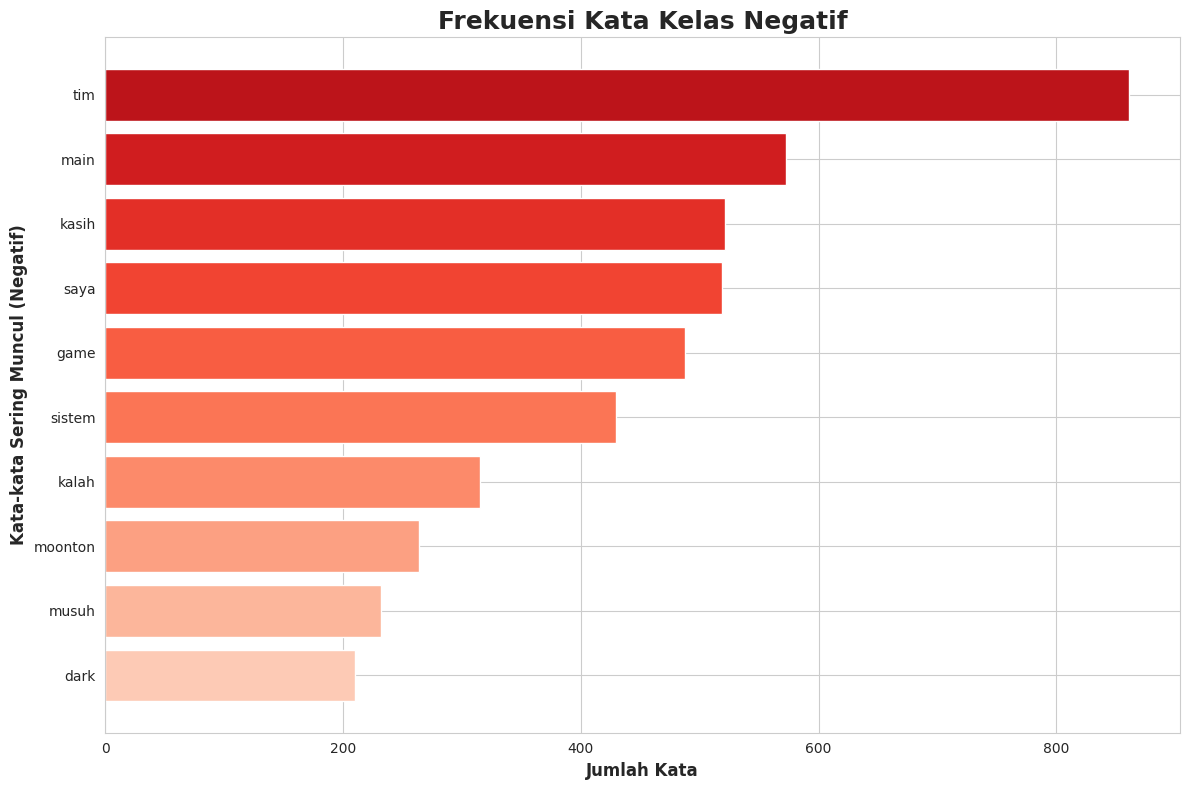

10 Kata Teratas untuk Sentimen Negatif dan Jumlah Kemunculannya:
tim: 861
main: 573
kasih: 521
saya: 519
game: 488
sistem: 430
kalah: 315
moonton: 264
musuh: 232
dark: 210


In [ ]:
# prompt: buat grafik kesamping Frekuensi Kata Kelas negatif

# Assuming df is your preprocessed DataFrame with 'stemming_data' and 'Sentiment' columns

# Filter data for negative sentiment
df_negatif = df[df['Sentiment'] == 'Negatif'].copy()

# Gabungkan teks dari kolom 'stemming_data' yang memiliki sentimen negatif
text_negatif = ' '.join(df_negatif['stemming_data'].astype(str).tolist())

# Create a dictionary for word normalization
normalization_map = {
    'gue': 'saya',
    'gua': 'saya'
    # Add other informal words and their standardized forms if needed
}

# Replace informal words in the text
for informal_word, standardized_word in normalization_map.items():
    text_negatif = text_negatif.replace(informal_word, standardized_word)

# Tokenize the text
tokens_negatif = text_negatif.split()

# Define stop words, including 'ya' and 'nya'
stopwords = set(STOPWORDS) # Start with default stopwords
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'ya', 'nya']) # Add 'ya', 'nya', and other specific words

# Filter tokens to remove stop words
filtered_tokens_negatif = [word for word in tokens_negatif if word not in stopwords]

# Count word frequencies from the filtered tokens
word_counts_negatif = Counter(filtered_tokens_negatif)

# Get the top 10 most common words with negative sentiment
top_words_negatif = word_counts_negatif.most_common(10)

# Check if top_words_negatif is not empty before unpacking
if top_words_negatif:
    word_negatif, count_negatif = zip(*top_words_negatif)

    # Urutkan data dari frekuensi terbanyak ke sedikit untuk grafik horizontal
    sorted_indices = np.argsort(count_negatif)
    word_negatif_sorted = [word_negatif[i] for i in sorted_indices]
    count_negatif_sorted = [count_negatif[i] for i in sorted_indices]


    # Define Color Palette
    colors_negatif = plt.cm.Reds(np.linspace(0.2, 0.8, len(word_negatif_sorted)))

    plt.figure(figsize=(12, 8))
    bars_negatif = plt.barh(word_negatif_sorted, count_negatif_sorted, color=colors_negatif)

    plt.xlabel("Jumlah Kata", fontsize=12, fontweight='bold')
    plt.ylabel("Kata-kata Sering Muncul (Negatif)", fontsize=12, fontweight='bold')
    plt.title("Frekuensi Kata Kelas Negatif", fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print jumlah kemunculan kata secara manual
    print("10 Kata Teratas untuk Sentimen Negatif dan Jumlah Kemunculannya:")
    for word, count in top_words_negatif:
        print(f"{word}: {count}")

else:
    print("Tidak ada kata yang tersisa untuk sentimen negatif setelah filtering.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Ambil dua dokumen dari kelas positif dan dua dari kelas negatif
positive_docs = df[df['Sentiment'] == 'Positif']['stemming_data'].head(2).tolist()
negative_docs = df[df['Sentiment'] == 'Negatif']['stemming_data'].head(2).tolist()

# Gabungkan semua dokumen yang dipilih
all_selected_docs = positive_docs + negative_docs

# Tampilkan komentar dari setiap dokumen
print("Dokumen 1 (Positif):", positive_docs[0])
print("Dokumen 2 (Positif):", positive_docs[1])
print("Dokumen 3 (Negatif):", negative_docs[0])
print("Dokumen 4 (Negatif):", negative_docs[1])

print("\n===============================================\n")

# Gabungkan semua kata dari dokumen yang dipilih
all_words = ' '.join(all_selected_docs).split()

# Hitung frekuensi kemunculan setiap kata
word_counts = Counter(all_words)

# Buat DataFrame untuk tabel frekuensi kata
frequency_table = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Frekuensi'])
frequency_table.index.name = 'Kata'
frequency_table = frequency_table.sort_values(by='Frekuensi', ascending=False)

print("Tabel Frekuensi Kemunculan Kata dari Empat Dokumen Pilihan:")
frequency_table.head(1000)

# Konversi tabel frekuensi ke format untuk Query Dokumen
query_doc_table = pd.DataFrame(columns=['1 (Positif)', '2 (Positif)', '3 (Negatif)', '4 (Negatif)'])

# Hitung kemunculan kata di masing-masing dokumen
for word in frequency_table.index:
    query_doc_table.loc[word, '1 (Positif)'] = positive_docs[0].split().count(word)
    query_doc_table.loc[word, '2 (Positif)'] = positive_docs[1].split().count(word)
    query_doc_table.loc[word, '3 (Negatif)'] = negative_docs[0].split().count(word)
    query_doc_table.loc[word, '4 (Negatif)'] = negative_docs[1].split().count(word)

query_doc_table.fillna(0, inplace=True)  # Mengisi NaN dengan 0
query_doc_table = query_doc_table.astype(int)  # Konversi ke integer

print("\nTabel Query Dokumen - Kemunculan Kata di Setiap Dokumen:")
query_doc_table.head(1000)



Dokumen 1 (Positif): agat bagus
Dokumen 2 (Positif): bagus senin gratis
Dokumen 3 (Negatif): kurang dark sistem
Dokumen 4 (Negatif): gue main game hilang stres tambah stres kurangkurangin dark sistem


Tabel Frekuensi Kemunculan Kata dari Empat Dokumen Pilihan:

Tabel Query Dokumen - Kemunculan Kata di Setiap Dokumen:


,1 (Positif),2 (Positif),3 (Negatif),4 (Negatif)
bagus,1,1,0,0
dark,0,0,1,1
stres,0,0,0,2
sistem,0,0,1,1
agat,1,0,0,0
senin,0,1,0,0
kurang,0,0,1,0
gratis,0,1,0,0
main,0,0,0,1
gue,0,0,0,1


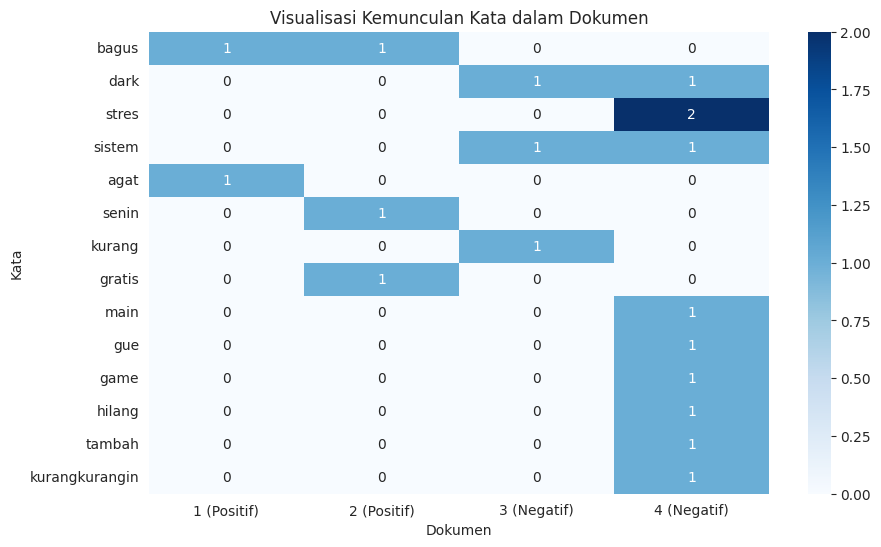

In [ ]:
# Visualisasi dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(query_doc_table, cmap='Blues', annot=True, fmt='d')
plt.title("Visualisasi Kemunculan Kata dalam Dokumen")
plt.xlabel("Dokumen")
plt.ylabel("Kata")
plt.show()

In [ ]:
# prompt: buat tabel Probabilitas Kelas Kata Positif dengan rumus  p ai vi = ni + 1/ n + kosakata
# dari frekuensi kemunculan kata dalam query_doc_table

# Tabel Probabilitas Kelas Kata Positif (P(ai|Vi=Positif))

# Hitung ni (jumlah kemunculan kata di kelas Positif)
# Jumlahkan kemunculan kata di kolom '1 (Positif)' dan '2 (Positif)'
query_doc_table['ni_Positif'] = query_doc_table['1 (Positif)'] + query_doc_table['2 (Positif)']

# Hitung n (jumlah total kata di kelas Positif)
n_Positif = query_doc_table['ni_Positif'].sum()

# Hitung kosakata (ukuran kosakata unik)
kosakata = len(query_doc_table)

# Hitung P(ai|Vi=Positif) = (ni + 1) / (n + kosakata)
query_doc_table['P(ai|Vi=Positif)'] = (query_doc_table['ni_Positif'] + 1) / (n_Positif + kosakata)

# Buat tabel probabilitas kelas kata Positif
prob_positif_table = query_doc_table[['ni_Positif', 'P(ai|Vi=Positif)']]

print("\nTabel Probabilitas Kelas Kata Positif:")
prob_positif_table.head(1000)


Tabel Probabilitas Kelas Kata Positif:


,ni_Positif,P(ai|Vi=Positif)
bagus,2,0.157895
dark,0,0.052632
stres,0,0.052632
sistem,0,0.052632
agat,1,0.105263
senin,1,0.105263
kurang,0,0.052632
gratis,1,0.105263
main,0,0.052632
gue,0,0.052632


In [ ]:
# prompt: # prompt: buat tabel Probabilitas Kelas Kata Negatifdengan rumus  p ai vi = ni + 1/ n + kosakata
# # dari frekuensi kemunculan kata dalam query_doc_table

# Hitung ni (jumlah kemunculan kata di kelas Negatif)
# Jumlahkan kemunculan kata di kolom '3 (Negatif)' dan '4 (Negatif)'
query_doc_table['ni_Negatif'] = query_doc_table['3 (Negatif)'] + query_doc_table['4 (Negatif)']

# Hitung n (jumlah total kata di kelas Negatif)
n_Negatif = query_doc_table['ni_Negatif'].sum()

# Hitung P(ai|Vi=Negatif) = (ni + 1) / (n + kosakata)
query_doc_table['P(ai|Vi=Negatif)'] = (query_doc_table['ni_Negatif'] + 1) / (n_Negatif + kosakata)

# Buat tabel probabilitas kelas kata Negatif
prob_negatif_table = query_doc_table[['ni_Negatif', 'P(ai|Vi=Negatif)']]

print("\nTabel Probabilitas Kelas Kata Negatif:")
prob_negatif_table.head(1000)




Tabel Probabilitas Kelas Kata Negatif:


,ni_Negatif,P(ai|Vi=Negatif)
bagus,0,0.037037
dark,2,0.111111
stres,2,0.111111
sistem,2,0.111111
agat,0,0.037037
senin,0,0.037037
kurang,1,0.074074
gratis,0,0.037037
main,1,0.074074
gue,1,0.074074


In [ ]:
# prompt: buat tabel Nilai Probabilitas Tanggapan Baru dari misal kalimat game dark sistem, berisi kelas nilai positif & negatif diambil dari query_doc_table, masing2 kata dari kalimat, nilai totalnya probabilitas

# Misal kalimat baru
kalimat_baru = "game dark sistem"

# Lakukan preprocessing pada kalimat baru (sesuai dengan langkah-langkah sebelumnya)
kalimat_baru_cleaned = remove_URL(kalimat_baru)
kalimat_baru_cleaned = remove_html(kalimat_baru_cleaned)
kalimat_baru_cleaned = remove_emoji(kalimat_baru_cleaned)
kalimat_baru_cleaned = remove_symbols(kalimat_baru_cleaned)
kalimat_baru_cleaned = remove_number(kalimat_baru_cleaned)
kalimat_baru_case_folding = case_folding(kalimat_baru_cleaned)

# Menggunakan kamus_tidak_baku yang sudah dimuat
kalimat_baru_normalisasi, _, _, _ = replace_taboo_words(kalimat_baru_case_folding, kamus_tidak_baku)

kalimat_baru_tokenize = tokenize(kalimat_baru_normalisasi)
kalimat_baru_stopword_removal = remove_stopwords(kalimat_baru_tokenize)

# Gunakan stemmer yang sudah diinisialisasi
kalimat_baru_stemmed = ' '.join(stem_text(kalimat_baru_stopword_removal))

# Pisahkan kata-kata dalam kalimat baru yang sudah dipreprocessing
kata_kalimat_baru = kalimat_baru_stemmed.split()

# Buat DataFrame untuk tabel probabilitas tanggapan baru
tabel_probabilitas_tanggapan_baru = pd.DataFrame(columns=['Kata', 'Nilai Probabilitas Positif', 'Nilai Probabilitas Negatif'])

# Isi tabel dengan probabilitas masing-masing kata dari kalimat baru
for kata in kata_kalimat_baru:
    prob_positif = 0
    prob_negatif = 0

    # Cari probabilitas kata di tabel probabilitas positif
    if kata in prob_positif_table.index:
        prob_positif = prob_positif_table.loc[kata, 'P(ai|Vi=Positif)']
    else:
        # Jika kata tidak ada di kosakata latih, gunakan probabilitas Laplace smoothing
        prob_positif = 1 / (n_Positif + kosakata) # Gunakan kosakata global yang sudah dihitung

    # Cari probabilitas kata di tabel probabilitas negatif
    if kata in prob_negatif_table.index:
        prob_negatif = prob_negatif_table.loc[kata, 'P(ai|Vi=Negatif)']
    else:
         # Jika kata tidak ada di kosakata latih, gunakan probabilitas Laplace smoothing
        prob_negatif = 1 / (n_Negatif + kosakata) # Gunakan kosakata global yang sudah dihitung


    tabel_probabilitas_tanggapan_baru = pd.concat([tabel_probabilitas_tanggapan_baru, pd.DataFrame({
        'Kata': [kata],
        'Nilai Probabilitas Positif': [prob_positif],
        'Nilai Probabilitas Negatif': [prob_negatif]
    })], ignore_index=True)

# Hitung total probabilitas untuk kelas positif dan negatif
# P(kelas | dokumen) = P(kelas) * P(kata1|kelas) * P(kata2|kelas) * ...
# P(Positif | dokumen) = P(Positif) * P(game|Positif) * P(dark|Positif) * P(sistem|Positif)
# P(Negatif | dokumen) = P(Negatif) * P(game|Negatif) * P(dark|Negatif) * P(sistem|Negatif)

# Hitung Prior Probability P(kelas)
total_dokumen = len(df)
jumlah_positif = len(df[df['Sentiment'] == 'Positif'])
jumlah_negatif = len(df[df['Sentiment'] == 'Negatif'])

p_positif = jumlah_positif / total_dokumen
p_negatif = jumlah_negatif / total_dokumen

# Hitung total probabilitas untuk kalimat baru
total_prob_positif = p_positif
total_prob_negatif = p_negatif

for kata in kata_kalimat_baru:
    prob_positif_kata = 0
    prob_negatif_kata = 0

    if kata in prob_positif_table.index:
        prob_positif_kata = prob_positif_table.loc[kata, 'P(ai|Vi=Positif)']
    else:
        prob_positif_kata = 1 / (n_Positif + kosakata)

    if kata in prob_negatif_table.index:
        prob_negatif_kata = prob_negatif_table.loc[kata, 'P(ai|Vi=Negatif)']
    else:
         prob_negatif_kata = 1 / (n_Negatif + kosakata)


    total_prob_positif *= prob_positif_kata
    total_prob_negatif *= prob_negatif_kata

# Tambahkan baris total probabilitas ke tabel
tabel_probabilitas_tanggapan_baru = pd.concat([tabel_probabilitas_tanggapan_baru, pd.DataFrame({
    'Kata': ['Total Probabilitas'],
    'Nilai Probabilitas Positif': [total_prob_positif],
    'Nilai Probabilitas Negatif': [total_prob_negatif]
})], ignore_index=True)


print("\nTabel Nilai Probabilitas Tanggapan Baru untuk kalimat:", kalimat_baru)
print(tabel_probabilitas_tanggapan_baru.round(10)) # Tampilkan dengan beberapa desimal



Tabel Nilai Probabilitas Tanggapan Baru untuk kalimat: game dark sistem
                 Kata  Nilai Probabilitas Positif  Nilai Probabilitas Negatif
0                game                    0.052632                    0.074074
1                dark                    0.052632                    0.111111
2              sistem                    0.052632                    0.111111
3  Total Probabilitas                    0.000081                    0.000404


<ipython-input-88-3776623413>:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabel_probabilitas_tanggapan_baru = pd.concat([tabel_probabilitas_tanggapan_baru, pd.DataFrame({


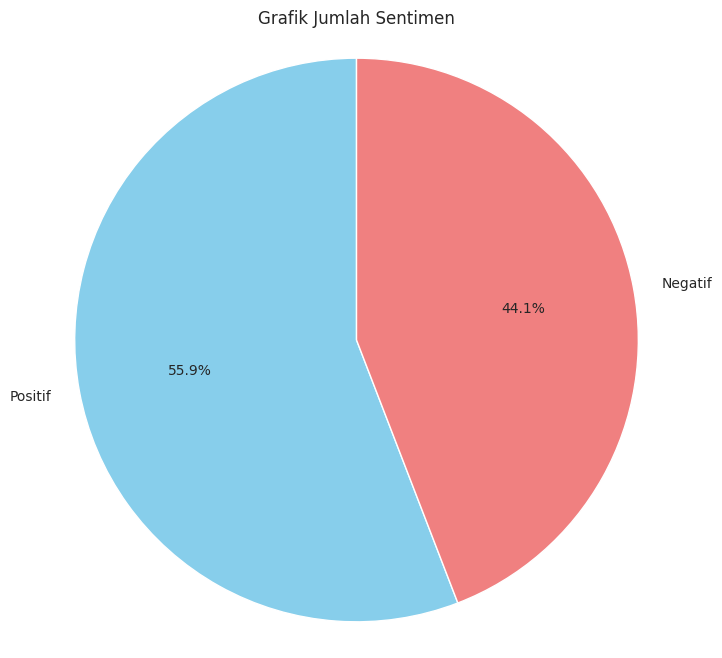

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have calculated sentiment_counts from your data
# If not, you can use the code from your notebook to get sentiment_counts

# Replace with the actual sentiment counts if needed
# sentiment_counts = df['Sentiment'].value_counts()

# Define your desired colors
custom_colors = ['skyblue', 'lightcoral'] # Example: light blue and light red

# Create the pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Grafik Jumlah Sentimen')
plt.axis('equal')  # Membuat diagram lingkaran menjadi lingkaran sempurna
plt.show()

In [ ]:
# prompt: hitung total perbandingan sentimen

# Menghitung total perbandingan sentimen
total_positive = sentiment_counts.get('Positif', 0)
total_negative = sentiment_counts.get('Negatif', 0)

print(f"Total ulasan positif: {total_positive}")
print(f"Total ulasan negatif: {total_negative}")
print(f"Total keseluruhan ulasan: {total_positive + total_negative}")


Total ulasan positif: 1937
Total ulasan negatif: 1531
Total keseluruhan ulasan: 3468


# Rating

In [ ]:
import pandas as pd

data = pd.read_csv('Hasil_labelling_data_mobile_legends(5375).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              4884 non-null   object
 1   Username          4884 non-null   object
 2   Rating            4884 non-null   int64 
 3   Review Text       4884 non-null   object
 4   cleaning          4884 non-null   object
 5   case_folding      4884 non-null   object
 6   normalisasi       4884 non-null   object
 7   tokenize          4884 non-null   object
 8   stopword removal  4884 non-null   object
 9   stemming_data     4884 non-null   object
 10  Sentiment         3468 non-null   object
dtypes: int64(1), object(10)
memory usage: 419.8+ KB


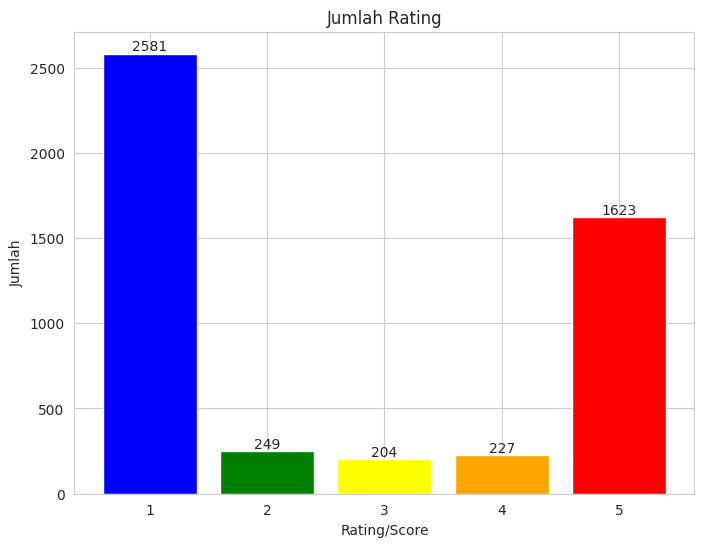

In [ ]:
import matplotlib.pyplot as plt

rating_counts = data['Rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['blue', 'green', 'yellow', 'orange', 'red']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Rating')
plt.xlabel('Rating/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()

****